# PROJECT: USED CAR PRICE PREDICTION - DATA ANALYSIS AND MODEL DEVELOPMENT

> **Import Dependancies**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Your Kaggle code goes here

# After your Kaggle code is executed, you can reset the warnings to their default behavior
warnings.filterwarnings("default")


In [2]:
#pip install kaggle --upgrade

### Data Acquistion

In [3]:
# unzip used-car-price-prediction-dataset.zip
#import zipfile
#zip_file_path = 'used-car-price-prediction-dataset.zip'
# Specify the directory where you want to extract the contents
#extraction_directory = "C:/Users/2018m/Downloads"

# Create a ZipFile object for the ZIP file
#with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    #zip_ref.extractall(extraction_directory)



In [4]:
path = '/kaggle/input/used-car-price-prediction-dataset/used_cars.csv'
df = pd.read_csv(path)
df.head()

brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic         Moonlight Cloud    Gray   
2          Automatic                    Blue   Black   
3        7-Speed A/T                   Black   Black   
4  8-Speed Automatic  Glacier White Metallic   Black   

                                 accident clean_title    price  
0  At least 1 accident or damage reported         Yes  $10,300  
1  At least 1 accident or damage reported         Yes  $38,005  
2                           None reported         NaN  $54,598  
3                           None reported         Yes  $15,500  
4                           None reported         NaN  $34,999

In [5]:
#save the file as csv
df.to_csv('used_cars.csv', index = False)

In [6]:
df.head()

brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic         Moonlight Cloud    Gray   
2          Automatic                    Blue   Black   
3        7-Speed A/T                   Black   Black   
4  8-Speed Automatic  Glacier White Metallic   Black   

                                 accident clean_title    price  
0  At least 1 accident or damage reported         Yes  $10,300  
1  At least 1 accident or damage reported         Yes  $38,005  
2                           None reported         NaN  $54,598  
3                           None reported         Yes  $15,500  
4                           None reported         NaN  $34,999

**>INSIGHTS:**

The above table is a data frame (df) which shows multiple columns related to features of a used Car, including Brand names, Model of the car, Year of Make, Miles driven, Type of fuel used, Engine of the car, The gear transmission, interior and exterior colors as well as accident and legal status. At the end we have price for each of the unqiue car.

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.dtypes

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object

**>INSIGHTS:**

Above output shows that only model_year has integer data type all others are object. 

However, there are many columns that should be float type but are object, i.e. milage & price

In [9]:
#Total number of rows and columns
df.shape

(4009, 12)

In [10]:
#Lets look for the total number of NaN values for each feature
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

We have to remove the null values later on.

In [11]:
#drop the model column
df.drop('model', axis = 1, inplace = True)


>Reason

'model' column doesn't play as much important role as other columns do, also each model is unique to a brand, so why not just use only brand.

In [12]:
df.head()

brand  model_year      milage      fuel_type  \
0      Ford        2013  51,000 mi.  E85 Flex Fuel   
1   Hyundai        2021  34,742 mi.       Gasoline   
2     Lexus        2022  22,372 mi.       Gasoline   
3  INFINITI        2015  88,900 mi.         Hybrid   
4      Audi        2021   9,835 mi.       Gasoline   

                                              engine       transmission  \
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...        6-Speed A/T   
1                               3.8L V6 24V GDI DOHC  8-Speed Automatic   
2                                     3.5 Liter DOHC          Automatic   
3  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...        7-Speed A/T   
4                         2.0L I4 16V GDI DOHC Turbo  8-Speed Automatic   

                  ext_col int_col                                accident  \
0                   Black   Black  At least 1 accident or damage reported   
1         Moonlight Cloud    Gray  At least 1 accident or damage reported   
2                    Blue   Black                           None reported   
3                   Black   Black                           None reported   
4  Glacier White Metallic   Black                           None reported   

  clean_title    price  
0         Yes  $10,300  
1         Yes  $38,005  
2         NaN  $54,598  
3         Yes  $15,500  
4         NaN  $34,999

In [13]:
#Lets get the full information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model_year    4009 non-null   int64 
 2   milage        4009 non-null   object
 3   fuel_type     3839 non-null   object
 4   engine        4009 non-null   object
 5   transmission  4009 non-null   object
 6   ext_col       4009 non-null   object
 7   int_col       4009 non-null   object
 8   accident      3896 non-null   object
 9   clean_title   3413 non-null   object
 10  price         4009 non-null   object
dtypes: int64(1), object(10)
memory usage: 344.6+ KB


### **Data Wrangling**

It is done to change column data types, extract information the column and also for transforming data in a columns.

In [14]:
#modify milage column
df['milage'] = df['milage'].str.replace(',', '').str.replace(' mi', '').astype(float)
df['milage']


0       51000.0
1       34742.0
2       22372.0
3       88900.0
4        9835.0
         ...   
4004      714.0
4005    10900.0
4006     2116.0
4007    33000.0
4008    43000.0
Name: milage, Length: 4009, dtype: float64

In [15]:
#remove the $ and , sign from price column and convert to float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['price']



0        10300.0
1        38005.0
2        54598.0
3        15500.0
4        34999.0
          ...   
4004    349950.0
4005     53900.0
4006     90998.0
4007     62999.0
4008     40000.0
Name: price, Length: 4009, dtype: float64

In [16]:
df.head()

brand  model_year   milage      fuel_type  \
0      Ford        2013  51000.0  E85 Flex Fuel   
1   Hyundai        2021  34742.0       Gasoline   
2     Lexus        2022  22372.0       Gasoline   
3  INFINITI        2015  88900.0         Hybrid   
4      Audi        2021   9835.0       Gasoline   

                                              engine       transmission  \
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...        6-Speed A/T   
1                               3.8L V6 24V GDI DOHC  8-Speed Automatic   
2                                     3.5 Liter DOHC          Automatic   
3  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...        7-Speed A/T   
4                         2.0L I4 16V GDI DOHC Turbo  8-Speed Automatic   

                  ext_col int_col                                accident  \
0                   Black   Black  At least 1 accident or damage reported   
1         Moonlight Cloud    Gray  At least 1 accident or damage reported   
2                    Blue   Black                           None reported   
3                   Black   Black                           None reported   
4  Glacier White Metallic   Black                           None reported   

  clean_title    price  
0         Yes  10300.0  
1         Yes  38005.0  
2         NaN  54598.0  
3         Yes  15500.0  
4         NaN  34999.0

In [17]:
#Lets find the most freq value in fuel_type
most_frequent_value = df['fuel_type'].value_counts().idxmax()
most_frequent_value

'Gasoline'

In [18]:
#replace null values in fuel_type with most frequent value
df['fuel_type'].fillna(most_frequent_value, inplace = True)



In [19]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3479
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [20]:
#replace dash and not supported values in fuel_type with 'Electric'
df['fuel_type'].replace('–', 'Electric', inplace = True)

In [21]:
#replace not supported in fuel_type with 'Electric'
df['fuel_type'].replace('not supported', 'Electric', inplace = True)

In [22]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3479
Hybrid             194
E85 Flex Fuel      139
Diesel             116
Electric            47
Plug-In Hybrid      34
Name: count, dtype: int64

In [23]:
#Drop the rows with null values in clean_title and accident column
df.dropna(subset = ['clean_title', 'accident'], axis = 0, inplace = True)

**>Reason**

Both of the above columns were dropped as in another analysis, it was seen that both columns don't have much impact on the price of the car.

Both features had no or weak relationship with price.

In [24]:
df.shape

(3413, 11)

In [25]:
import re
# Define a function to extract engine attributes
def extract_engine_attributes(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else ''

# Apply the function to create new columns
df[['Horsepower', 'Engine_Displacement']] = df['engine'].apply(extract_engine_attributes).apply(pd.Series)

**>Function**

The above function is specifically crafted to extract Horsepower and Engine Displacement from engine column, based on specific characters.

In [26]:
df.head()

brand  model_year    milage      fuel_type  \
0      Ford        2013   51000.0  E85 Flex Fuel   
1   Hyundai        2021   34742.0       Gasoline   
3  INFINITI        2015   88900.0         Hybrid   
6      Audi        2017   84000.0       Gasoline   
7       BMW        2001  242000.0       Gasoline   

                                              engine       transmission  \
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...        6-Speed A/T   
1                               3.8L V6 24V GDI DOHC  8-Speed Automatic   
3  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...        7-Speed A/T   
6       292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel        6-Speed A/T   
7       282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel                A/T   

           ext_col int_col                                accident  \
0            Black   Black  At least 1 accident or damage reported   
1  Moonlight Cloud    Gray  At least 1 accident or damage reported   
3            Black   Black                           None reported   
6             Blue   Black                           None reported   
7            Green   Green                           None reported   

  clean_title    price Horsepower Engine_Displacement  
0         Yes  10300.0      300.0                3.7L  
1         Yes  38005.0       None                3.8L  
3         Yes  15500.0      354.0                3.5L  
6         Yes  31000.0      292.0                2.0L  
7         Yes   7300.0      282.0                4.4L

In [27]:
df['Horsepower'].isnull().sum()

242

In [28]:
#convert dtype of Horsepower to float
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors = 'coerce')
df['Horsepower'].dtype


dtype('float64')

In [29]:
#Replace null values in Horsepower with mean
df['Horsepower'].fillna(df['Horsepower'].mean(), inplace = True)
df['Horsepower'].isnull().sum()

0

In [30]:
#strip the L from Engine_Displacement
df['Engine_Displacement'] = df['Engine_Displacement'].str.replace('L', '')

In [31]:
#Change the dtype of Engine_Displacement to numeric
df['Engine_Displacement'] = pd.to_numeric(df['Engine_Displacement'], errors = 'coerce')

In [32]:
#Replace null values in Engine_Displacement with mean
df['Engine_Displacement'].fillna(df['Engine_Displacement'].mean(), inplace = True)
df['Engine_Displacement'].isnull().sum()

0

In [33]:
df.head()

brand  model_year    milage      fuel_type  \
0      Ford        2013   51000.0  E85 Flex Fuel   
1   Hyundai        2021   34742.0       Gasoline   
3  INFINITI        2015   88900.0         Hybrid   
6      Audi        2017   84000.0       Gasoline   
7       BMW        2001  242000.0       Gasoline   

                                              engine       transmission  \
0  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...        6-Speed A/T   
1                               3.8L V6 24V GDI DOHC  8-Speed Automatic   
3  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...        7-Speed A/T   
6       292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel        6-Speed A/T   
7       282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel                A/T   

           ext_col int_col                                accident  \
0            Black   Black  At least 1 accident or damage reported   
1  Moonlight Cloud    Gray  At least 1 accident or damage reported   
3            Black   Black                           None reported   
6             Blue   Black                           None reported   
7            Green   Green                           None reported   

  clean_title    price  Horsepower  Engine_Displacement  
0         Yes  10300.0  300.000000                  3.7  
1         Yes  38005.0  331.445122                  3.8  
3         Yes  15500.0  354.000000                  3.5  
6         Yes  31000.0  292.000000                  2.0  
7         Yes   7300.0  282.000000                  4.4

In [34]:
#drop engine column
df.drop('engine', axis = 1, inplace = True)

In [35]:
df.shape

(3413, 12)

In [36]:
#subtract the values in model_year from 2023 to get the age of the car
df['age'] = 2023 - df['model_year']

In [37]:
df.head()

brand  model_year    milage      fuel_type       transmission  \
0      Ford        2013   51000.0  E85 Flex Fuel        6-Speed A/T   
1   Hyundai        2021   34742.0       Gasoline  8-Speed Automatic   
3  INFINITI        2015   88900.0         Hybrid        7-Speed A/T   
6      Audi        2017   84000.0       Gasoline        6-Speed A/T   
7       BMW        2001  242000.0       Gasoline                A/T   

           ext_col int_col                                accident  \
0            Black   Black  At least 1 accident or damage reported   
1  Moonlight Cloud    Gray  At least 1 accident or damage reported   
3            Black   Black                           None reported   
6             Blue   Black                           None reported   
7            Green   Green                           None reported   

  clean_title    price  Horsepower  Engine_Displacement  age  
0         Yes  10300.0  300.000000                  3.7   10  
1         Yes  38005.0  331.445122                  3.8    2  
3         Yes  15500.0  354.000000                  3.5    8  
6         Yes  31000.0  292.000000                  2.0    6  
7         Yes   7300.0  282.000000                  4.4   22

In [38]:
#drop model_year column
df.drop('model_year', axis = 1, inplace = True)

In [39]:
df.head()

brand    milage      fuel_type       transmission          ext_col  \
0      Ford   51000.0  E85 Flex Fuel        6-Speed A/T            Black   
1   Hyundai   34742.0       Gasoline  8-Speed Automatic  Moonlight Cloud   
3  INFINITI   88900.0         Hybrid        7-Speed A/T            Black   
6      Audi   84000.0       Gasoline        6-Speed A/T             Blue   
7       BMW  242000.0       Gasoline                A/T            Green   

  int_col                                accident clean_title    price  \
0   Black  At least 1 accident or damage reported         Yes  10300.0   
1    Gray  At least 1 accident or damage reported         Yes  38005.0   
3   Black                           None reported         Yes  15500.0   
6   Black                           None reported         Yes  31000.0   
7   Green                           None reported         Yes   7300.0   

   Horsepower  Engine_Displacement  age  
0  300.000000                  3.7   10  
1  331.445122                  3.8    2  
3  354.000000                  3.5    8  
6  292.000000                  2.0    6  
7  282.000000                  4.4   22

**>INSIGHTS**

* By the end of Data Wrangling, we have removed 'model', 'engine', 'model_year', 'clean_title', 'accident' columns from the data frame after citing certain reasons.

* From 'engine' column - Horsepower and 'Engine_Displacement' were obtained.

* 'model_year' was converted to 'age' of the car.

### **Exploratory Data Analysis**

It is done explore relationships between various variables either through visualizations or statistics and to determine the significane of those relationships.

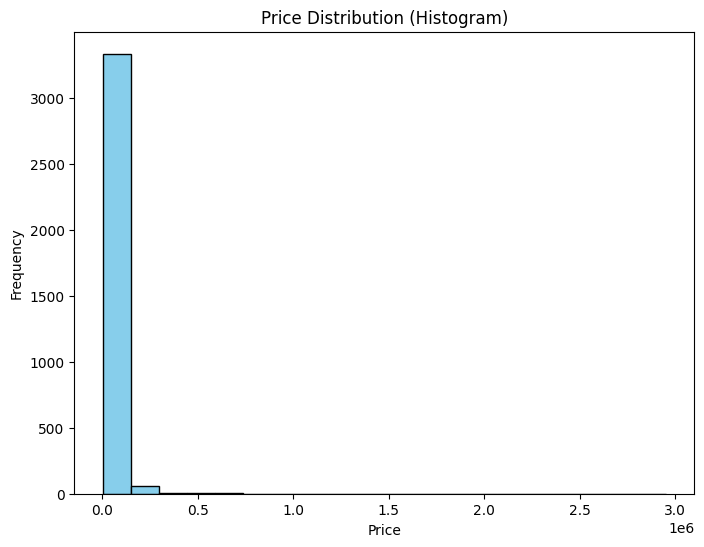

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()




**>INSIGHTS**

Above Histogram shows that most cars lie in the lower range of price. 

The data has too many outliers as seen from the above graph and hence needs to be removed - to get near normal distribution.

/tmp/ipykernel_20/4062617948.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], color='purple', shade=True)


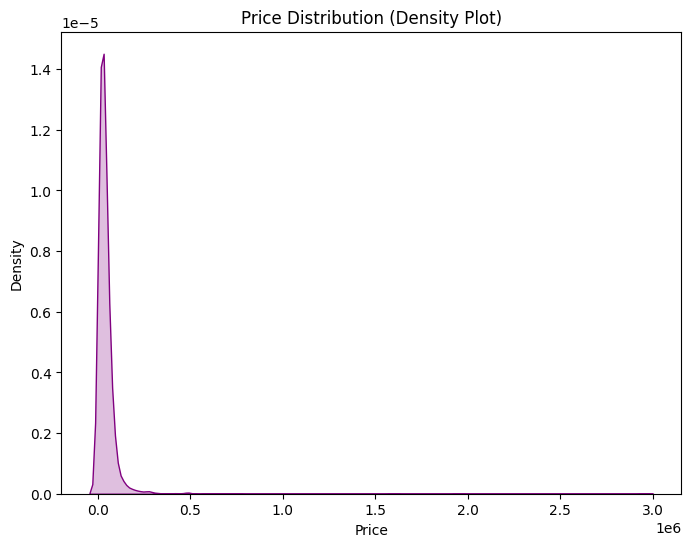

In [41]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['price'], color='purple', shade=True)
plt.title('Price Distribution (Density Plot)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

**>INSIGHTS**

Above plot - Density Distribution plot for price.

Again it shows are very right skewed distribution and a very narrow line that extends to the right corner of the graph.

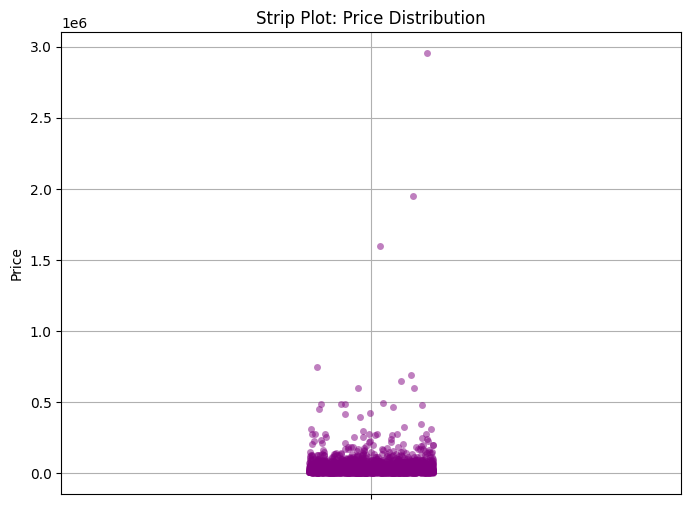

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a strip plot for the 'price' variable
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, y='price', jitter=True, color='purple', alpha=0.5)
plt.title('Strip Plot: Price Distribution')
plt.ylabel('Price')
plt.grid(True)
plt.show()


**>STRIP PLOT**

A great way to visualize the spread of numerical data.

The above plot shows how far the values are from the mean values - too many outliers.

In [43]:
df['price'].describe()

count    3.413000e+03
mean     4.173439e+04
std      8.147277e+04
min      2.000000e+03
25%      1.590000e+04
50%      2.900000e+04
75%      4.750000e+04
max      2.954083e+06
Name: price, dtype: float64

**>Descriptive Statistics - INSIGHTS**

The above descriptive analysis shows that the price column has a wider standard deviation and shows that it has potential outliers that should be removed.

**>OUTLIERS REMOVAL METHOD - IQR METHOD**

The above graph has outliers from 0.4 onwards, which need to be removed

In [44]:
#identify and remove outliers from the data df in relation to price column using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

31600.0


In [45]:
#use IQR value to filter out the outliers
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) |(df['price'] > (Q3 + 0.7 * IQR)))]
df.shape

(3012, 12)

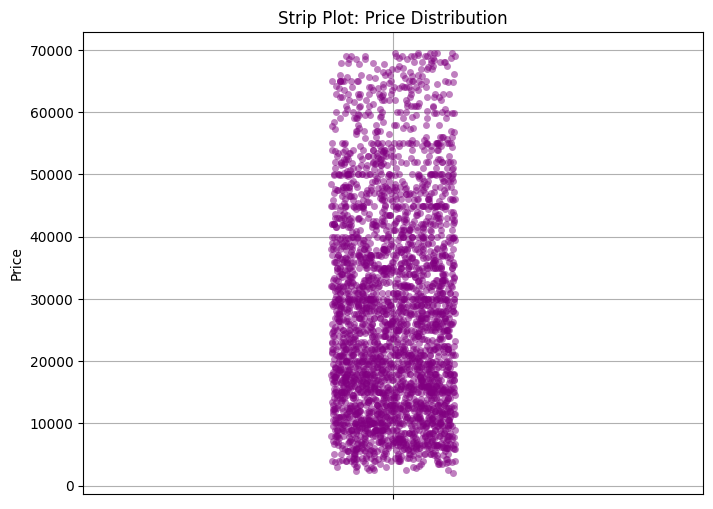

In [46]:
#strip plot after removing outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Create a strip plot for the 'price' variable
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, y='price', jitter=True, color='purple', alpha=0.5)
plt.title('Strip Plot: Price Distribution')
plt.ylabel('Price')
plt.grid(True)
plt.show()

**>INSIGHTS**

The above plot looks more homogeneous than the previous one after removal of outliers. 

Still the data is a little right skewed but it will work for our analysis.

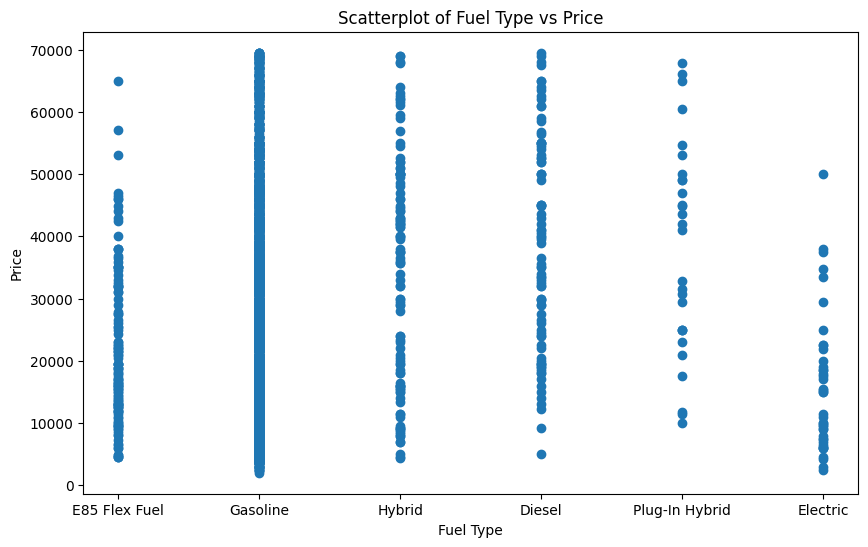

In [47]:
#visualize fuel_type column in regrads to price
plt.figure(figsize = (10, 6))
plt.scatter(df['fuel_type'], df['price'])
plt.title('Scatterplot of Fuel Type vs Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


**>INSIGHTS:**

The above scatter plot shows that - Gasoline has more consistant values and have a larger range of car prices.

A near similar pattern can be seen in Hybrid type.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'E85 Flex Fuel'),
  Text(1, 0, 'Gasoline'),
  Text(2, 0, 'Hybrid'),
  Text(3, 0, 'Diesel'),
  Text(4, 0, 'Plug-In Hybrid'),
  Text(5, 0, 'Electric')])

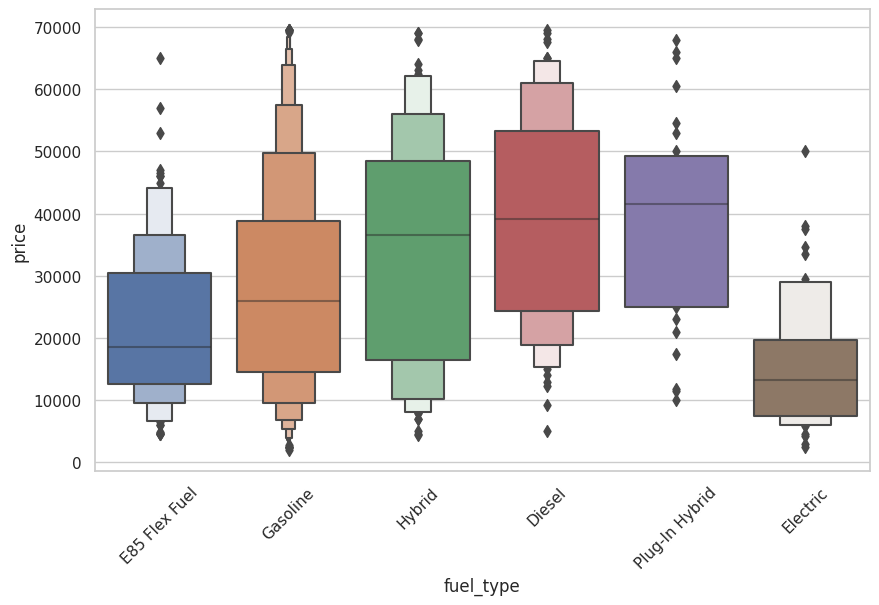

In [48]:
#create a boxplot of fuel_type vs price
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxenplot(x = 'fuel_type', y = 'price', data =df)
plt.xticks(rotation=45)


**>BOXPLOT - INSIGHTS**

* The above Boxplot shows that the mean price for Plug-In Hybrid is the highest among all.

* Meanwhile, Gasoline has a larger range.

In [49]:
#identify and remove outliers from df

In [50]:
df.shape

(3012, 12)

In [51]:
import pandas as pd

# Calculate quartiles
Q1 = df['price'].quantile(0.25)
Q2 = df['price'].median()
Q3 = df['price'].quantile(0.75)

# Define a function to categorize data points into quartiles
def categorize_quartile(value):
    if value < Q1:
        return "Q1 (25%)"
    elif value < Q2:
        return "Q2 (50%)"
    elif value < Q3:
        return "Q3 (75%)"
    else:
        return "Q4 (100%)"

# Apply the categorize_quartile function to the 'price' column
df['Quartile'] = df['price'].apply(categorize_quartile)

# Count the number of data points in each quartile
quartile_counts = df['Quartile'].value_counts().reset_index()
quartile_counts.columns = ['Quartile', 'Count']

# Display the quartile distribution table
print(quartile_counts)


    Quartile  Count
0  Q4 (100%)    756
1   Q2 (50%)    753
2   Q3 (75%)    752
3   Q1 (25%)    751


In [52]:
df.describe()


milage         price   Horsepower  Engine_Displacement  \
count    3012.000000   3012.000000  3012.000000          3012.000000   
mean    77291.058433  28132.581341   311.610244             3.633475   
std     52443.195071  16577.205102    97.464659             1.369728   
min       100.000000   2000.000000    70.000000             0.650000   
25%     37056.250000  14900.000000   245.000000             2.500000   
50%     68500.000000  25900.000000   308.000000             3.500000   
75%    107000.000000  39500.000000   365.000000             4.600000   
max    405000.000000  69500.000000   778.000000             8.300000   

               age  
count  3012.000000  
mean      8.772576  
std       6.046516  
min      -1.000000  
25%       4.000000  
50%       7.000000  
75%      12.000000  
max      31.000000

In [53]:
#value counts of clean_title column
df['clean_title'].value_counts()


clean_title
Yes    3012
Name: count, dtype: int64

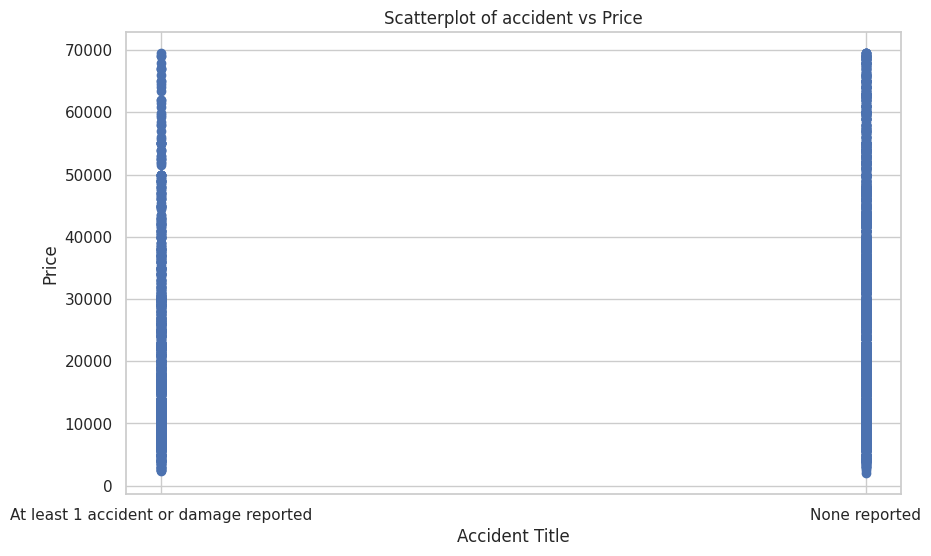

In [54]:
# scatterplot of clean_title vs price
plt.figure(figsize = (10, 6))
plt.scatter(df['accident'], df['price'])
plt.title('Scatterplot of accident vs Price')
plt.xlabel('Accident Title')
plt.ylabel('Price')
plt.show()


In [55]:
df.head()

brand    milage      fuel_type       transmission          ext_col  \
0      Ford   51000.0  E85 Flex Fuel        6-Speed A/T            Black   
1   Hyundai   34742.0       Gasoline  8-Speed Automatic  Moonlight Cloud   
3  INFINITI   88900.0         Hybrid        7-Speed A/T            Black   
6      Audi   84000.0       Gasoline        6-Speed A/T             Blue   
7       BMW  242000.0       Gasoline                A/T            Green   

  int_col                                accident clean_title    price  \
0   Black  At least 1 accident or damage reported         Yes  10300.0   
1    Gray  At least 1 accident or damage reported         Yes  38005.0   
3   Black                           None reported         Yes  15500.0   
6   Black                           None reported         Yes  31000.0   
7   Green                           None reported         Yes   7300.0   

   Horsepower  Engine_Displacement  age  Quartile  
0  300.000000                  3.7   10  Q1 (25%)  
1  331.445122                  3.8    2  Q3 (75%)  
3  354.000000                  3.5    8  Q2 (50%)  
6  292.000000                  2.0    6  Q3 (75%)  
7  282.000000                  4.4   22  Q1 (25%)

In [56]:
df['clean_title'].nunique()

1

In [57]:
#drop clean_title column , accident column and Quartile column
df.drop(['clean_title', 'accident', 'Quartile'], axis = 1, inplace = True)


In [58]:
df

brand    milage      fuel_type                    transmission  \
0              Ford   51000.0  E85 Flex Fuel                     6-Speed A/T   
1           Hyundai   34742.0       Gasoline               8-Speed Automatic   
3          INFINITI   88900.0         Hybrid                     7-Speed A/T   
6              Audi   84000.0       Gasoline                     6-Speed A/T   
7               BMW  242000.0       Gasoline                             A/T   
...             ...       ...            ...                             ...   
4001     Volkswagen  194000.0       Gasoline  Transmission w/Dual Shift Mode   
4003  Mercedes-Benz   53705.0       Gasoline                             A/T   
4005           Audi   10900.0       Gasoline  Transmission w/Dual Shift Mode   
4007           Ford   33000.0       Gasoline                             A/T   
4008            BMW   43000.0       Gasoline                             A/T   

              ext_col int_col    price  Horsepower  Engine_Displacement  age  
0               Black   Black  10300.0  300.000000                  3.7   10  
1     Moonlight Cloud    Gray  38005.0  331.445122                  3.8    2  
3               Black   Black  15500.0  354.000000                  3.5    8  
6                Blue   Black  31000.0  292.000000                  2.0    6  
7               Green   Green   7300.0  282.000000                  4.4   22  
...               ...     ...      ...         ...                  ...  ...  
4001            Black    Gray   3500.0  283.000000                  3.6   12  
4003            Black   Black  25900.0  241.000000                  2.0    5  
4005            Black   Black  53900.0  349.000000                  3.0    1  
4007             Blue   Black  62999.0  450.000000                  3.5    3  
4008             Gray   Brown  40000.0  248.000000                  2.0    3  

[3012 rows x 10 columns]

In [59]:
print(df['int_col'].nunique())
print(df['ext_col'].nunique())

56
101


#### **Data Grouping**

It is done to analyze the relationship of a categories in categorical variables with other variables in the data frame.

In [60]:
#create a group of transmission, fuel_type and price
df_group = df.groupby(['transmission', 'fuel_type'])['price'].mean().reset_index()
#create a pivot table
df_pivot = df_group.pivot(index = 'transmission', columns = 'fuel_type', values = 'price')
df_pivot

fuel_type                                Diesel  E85 Flex Fuel      Electric  \
transmission                                                                   
1-Speed A/T                                 NaN            NaN           NaN   
1-Speed Automatic                           NaN            NaN           NaN   
10-Speed A/T                       58874.750000   40300.000000           NaN   
10-Speed Automatic                          NaN            NaN           NaN   
4-Speed A/T                        17000.000000   11785.000000  12600.000000   
4-Speed Automatic                           NaN   22495.000000           NaN   
5-Speed A/T                        21612.375000            NaN  22500.000000   
5-Speed Automatic                           NaN            NaN           NaN   
5-Speed M/T                                 NaN            NaN  10699.833333   
6-Speed A/T                        44627.030303   22504.450000           NaN   
6-Speed Automatic                  43640.000000            NaN           NaN   
6-Speed Automatic with Auto-Shift           NaN   13895.000000           NaN   
6-Speed M/T                                 NaN            NaN  38925.000000   
6-Speed Manual                     26095.000000            NaN           NaN   
7-Speed A/T                        52166.333333   21200.000000           NaN   
7-Speed Automatic                           NaN            NaN           NaN   
7-Speed Automatic with Auto-Shift           NaN            NaN           NaN   
7-Speed M/T                                 NaN            NaN           NaN   
8-Speed A/T                        32149.166667   22873.750000  38000.000000   
8-Speed Automatic                           NaN   26664.000000           NaN   
8-Speed Automatic with Auto-Shift           NaN            NaN           NaN   
9-Speed A/T                        65000.000000    5995.000000  14500.000000   
9-Speed Automatic                           NaN            NaN           NaN   
A/T                                33638.416667   21247.983871  12242.521739   
Automatic                                   NaN            NaN           NaN   
Automatic CVT                               NaN            NaN           NaN   
CVT Transmission                            NaN            NaN           NaN   
M/T                                         NaN            NaN           NaN   
Transmission Overdrive Switch               NaN   23299.666667           NaN   
Transmission w/Dual Shift Mode     43200.000000   23686.000000  17000.000000   

fuel_type                              Gasoline        Hybrid  Plug-In Hybrid  
transmission                                                                   
1-Speed A/T                        39828.680000           NaN             NaN  
1-Speed Automatic                  30090.500000           NaN             NaN  
10-Speed A/T                       47948.000000  53750.000000             NaN  
10-Speed Automatic                 46507.387097           NaN             NaN  
4-Speed A/T                        13788.350000  20995.000000             NaN  
4-Speed Automatic                  15490.000000           NaN             NaN  
5-Speed A/T                        15381.945205           NaN             NaN  
5-Speed Automatic                  30264.750000           NaN             NaN  
5-Speed M/T                        14756.450980           NaN             NaN  
6-Speed A/T                        21191.123134  19373.500000    44990.000000  
6-Speed Automatic                  27473.552632           NaN             NaN  
6-Speed Automatic with Auto-Shift  10995.000000  31995.000000             NaN  
6-Speed M/T                        27414.155963           NaN             NaN  
6-Speed Manual                     22550.000000           NaN             NaN  
7-Speed A/T                        32658.175000  33471.625000             NaN  
7-Speed Automatic                  20470.000000           NaN             NaN  

In [61]:
#fill the null values with mean
df_pivot.fillna(df_pivot.mean(), inplace = True)
df_pivot

fuel_type                                Diesel  E85 Flex Fuel      Electric  \
transmission                                                                   
1-Speed A/T                        39818.461088   21328.820878  20808.419384   
1-Speed Automatic                  39818.461088   21328.820878  20808.419384   
10-Speed A/T                       58874.750000   40300.000000  20808.419384   
10-Speed Automatic                 39818.461088   21328.820878  20808.419384   
4-Speed A/T                        17000.000000   11785.000000  12600.000000   
4-Speed Automatic                  39818.461088   22495.000000  20808.419384   
5-Speed A/T                        21612.375000   21328.820878  22500.000000   
5-Speed Automatic                  39818.461088   21328.820878  20808.419384   
5-Speed M/T                        39818.461088   21328.820878  10699.833333   
6-Speed A/T                        44627.030303   22504.450000  20808.419384   
6-Speed Automatic                  43640.000000   21328.820878  20808.419384   
6-Speed Automatic with Auto-Shift  39818.461088   13895.000000  20808.419384   
6-Speed M/T                        39818.461088   21328.820878  38925.000000   
6-Speed Manual                     26095.000000   21328.820878  20808.419384   
7-Speed A/T                        52166.333333   21200.000000  20808.419384   
7-Speed Automatic                  39818.461088   21328.820878  20808.419384   
7-Speed Automatic with Auto-Shift  39818.461088   21328.820878  20808.419384   
7-Speed M/T                        39818.461088   21328.820878  20808.419384   
8-Speed A/T                        32149.166667   22873.750000  38000.000000   
8-Speed Automatic                  39818.461088   26664.000000  20808.419384   
8-Speed Automatic with Auto-Shift  39818.461088   21328.820878  20808.419384   
9-Speed A/T                        65000.000000    5995.000000  14500.000000   
9-Speed Automatic                  39818.461088   21328.820878  20808.419384   
A/T                                33638.416667   21247.983871  12242.521739   
Automatic                          39818.461088   21328.820878  20808.419384   
Automatic CVT                      39818.461088   21328.820878  20808.419384   
CVT Transmission                   39818.461088   21328.820878  20808.419384   
M/T                                39818.461088   21328.820878  20808.419384   
Transmission Overdrive Switch      39818.461088   23299.666667  20808.419384   
Transmission w/Dual Shift Mode     43200.000000   23686.000000  17000.000000   

fuel_type                              Gasoline        Hybrid  Plug-In Hybrid  
transmission                                                                   
1-Speed A/T                        39828.680000  34977.914914    38165.982143  
1-Speed Automatic                  30090.500000  34977.914914    38165.982143  
10-Speed A/T                       47948.000000  53750.000000    38165.982143  
10-Speed Automatic                 46507.387097  34977.914914    38165.982143  
4-Speed A/T                        13788.350000  20995.000000    38165.982143  
4-Speed Automatic                  15490.000000  34977.914914    38165.982143  
5-Speed A/T                        15381.945205  34977.914914    38165.982143  
5-Speed Automatic                  30264.750000  34977.914914    38165.982143  
5-Speed M/T                        14756.450980  34977.914914    38165.982143  
6-Speed A/T                        21191.123134  19373.500000    44990.000000  
6-Speed Automatic                  27473.552632  34977.914914    38165.982143  
6-Speed Automatic with Auto-Shift  10995.000000  31995.000000    38165.982143  
6-Speed M/T                        27414.155963  34977.914914    38165.982143  
6-Speed Manual                     22550.000000  34977.914914    38165.982143  
7-Speed A/T                        32658.175000  33471.625000    38165.982143  
7-Speed Automatic                  20470.000000  34977.914914    38165.982143  

**>INSIGHTS**

In the above code, transmission, fuel_type and price were grouped together and then pivot table was created in relation to price column.

The Nan values in pivot table were filled with mean of the pivot.

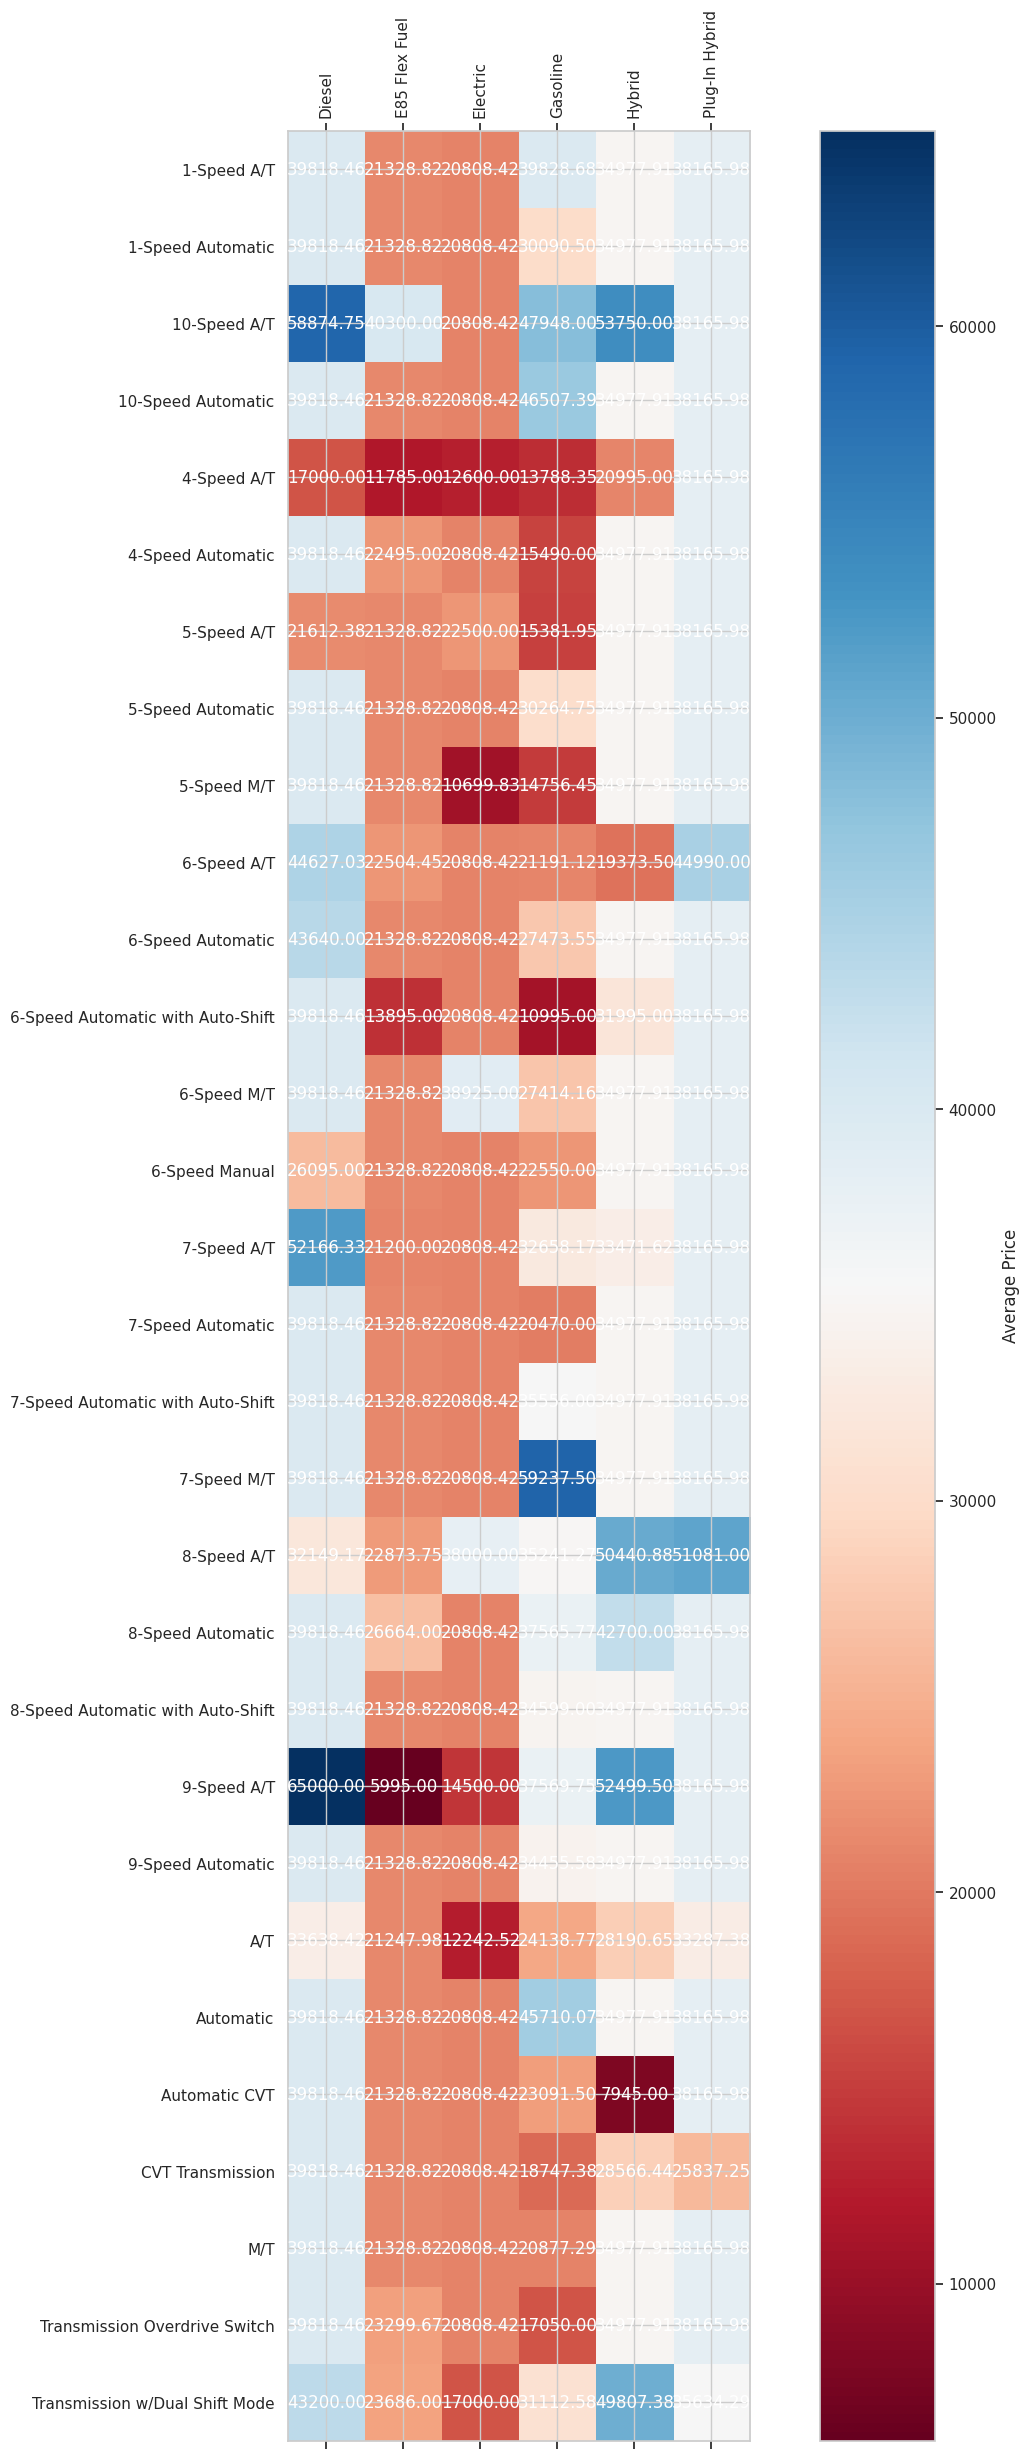

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a heatmap
fig, ax = plt.subplots(figsize=(18, 30), dpi=100)
cax = ax.matshow(df_pivot, cmap='RdBu')

# Label names
row_labels = df_pivot.columns
col_labels = df_pivot.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]))
ax.set_yticks(np.arange(df_pivot.shape[0]))

# Insert labels
ax.set_xticklabels(row_labels)
ax.set_yticklabels(col_labels)

# Rotate label if too long
plt.xticks(rotation=90)

# Add price numbers on each box
for i in range(len(col_labels)):
    for j in range(len(row_labels)):
        text = ax.text(j, i, f'{df_pivot.iloc[i, j]:.2f}', ha='center', va='center', color='w')

plt.colorbar(cax, label='Average Price')
plt.show()


**>HEATMAP - INSIGHTS**

* The heatmap above is based on the pivot table created previously.

* The number on each colored box, show mean price for the a certain transmission type with a certain fuel_type.

* Eg. The transmission type '9 - Speed A/T' has the highest price if it is 'Diesel' fuel_type, which is 65,000.

* The blue indicates higher values , while red accounts for lower values.

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000., 450000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000'),
  Text(400000.0, 0, '400000'),
  Text(450000.0, 0, '450000')])

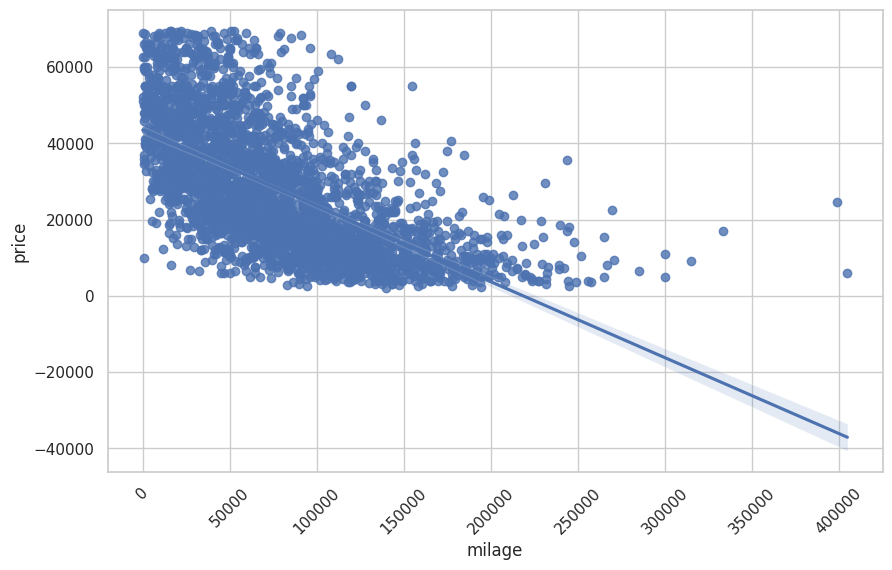

In [63]:
#draw and regression plot of milage vs price
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'milage', y = 'price', data =df)
plt.xticks(rotation=45)


**>INSIGHTS**

The regression plot above shows that - the more miles the car has driven - the lesser the selling price.

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

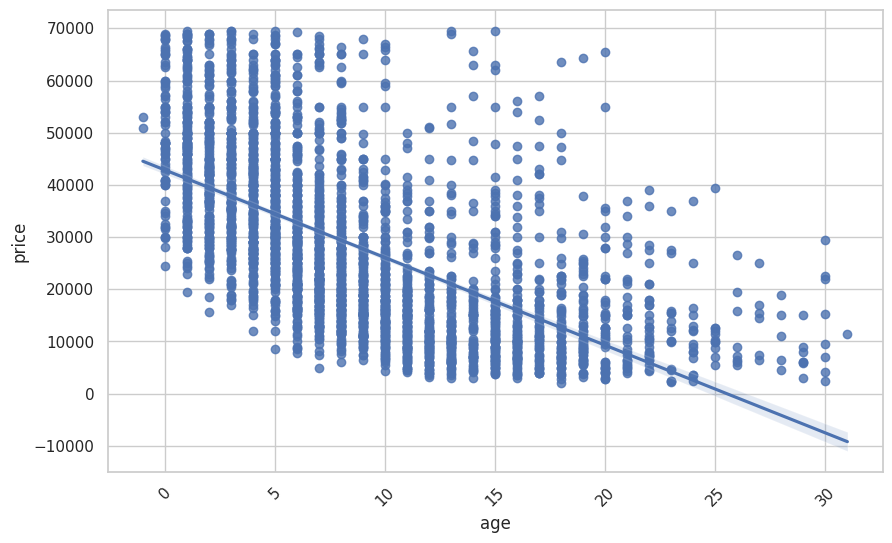

In [64]:
#draw and regression plot of age vs price
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'age', y = 'price', data =df)
plt.xticks(rotation=45)


**>INSIGHTS**

Regression Plot - 'age' vs 'price'

The older the car - the lesser the selling price.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([-20.,   0.,  20.,  40.,  60.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60')])

<Figure size 1000x600 with 0 Axes>

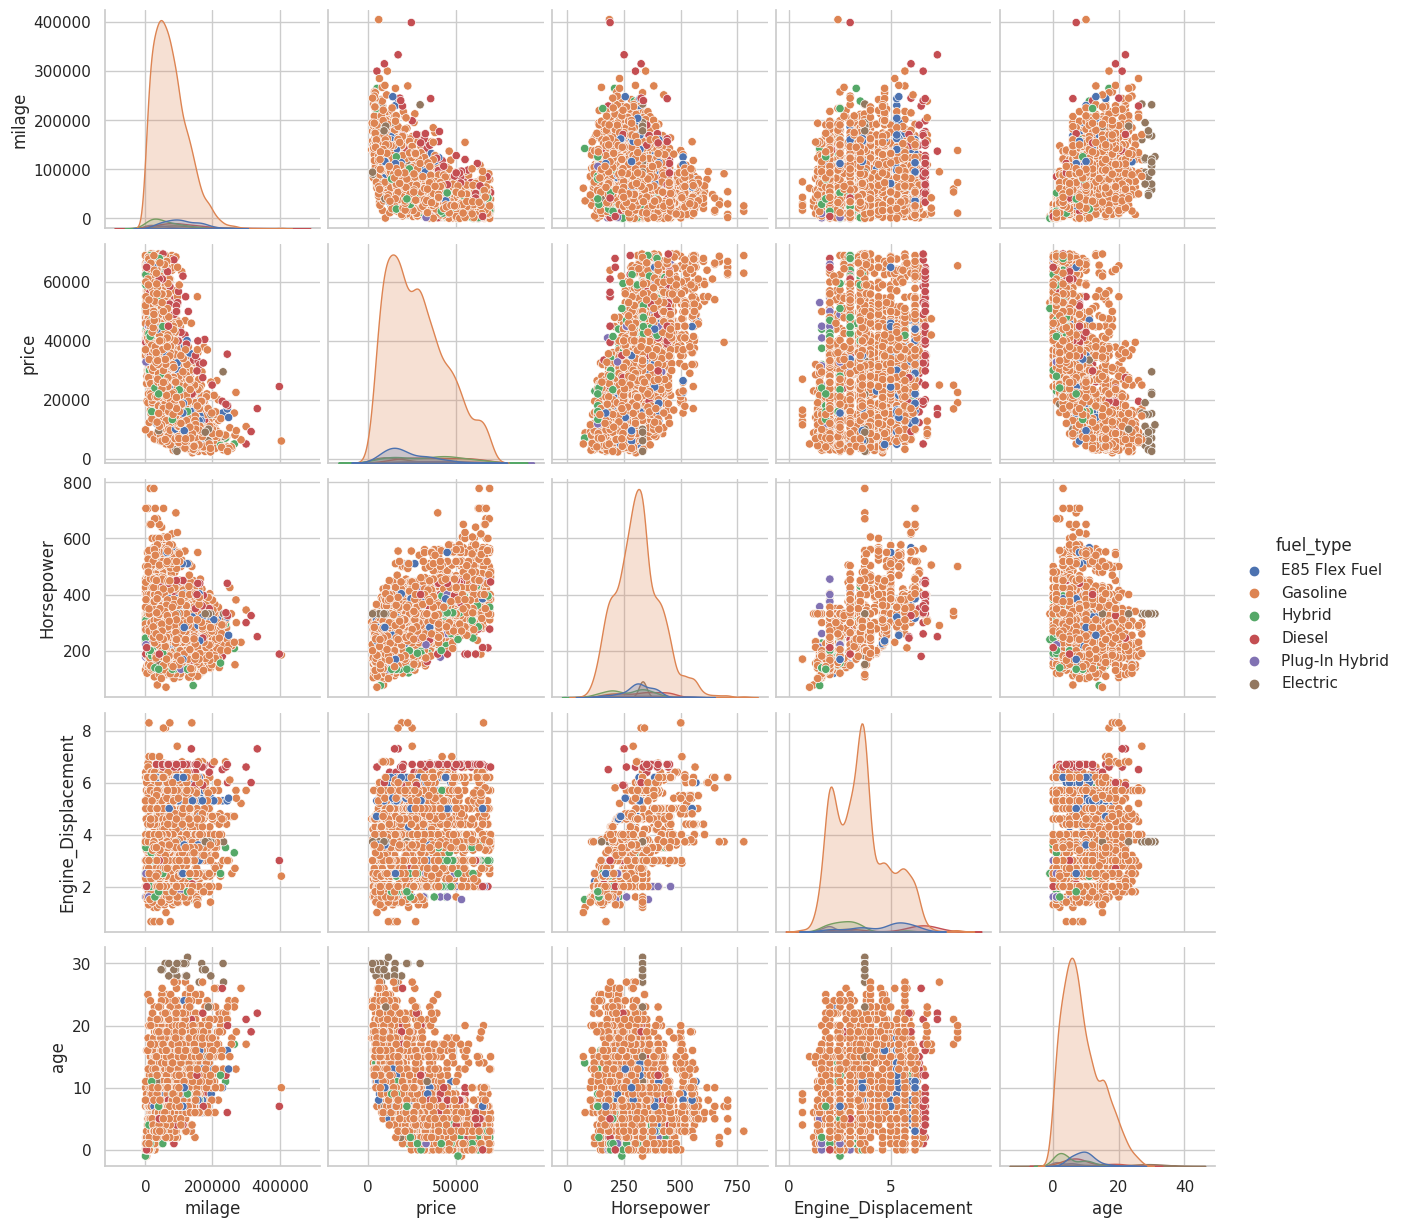

In [65]:
#draw a pairplot of all the features in df except brand, transmission
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue = 'fuel_type')
plt.xticks(rotation=45)


**INSIGHTS:**

* The pairplots above show the dominance of Gasoline fuel type cars in relation to car price, engine_displacement, age, Horsepower & milage.
* It means that if one wants to sell a car - he would sell it at higher price if it is Gasoline fuel type, lower age, lower milage, higher engine displacement.

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800'),
  Text(900.0, 0, '900')])

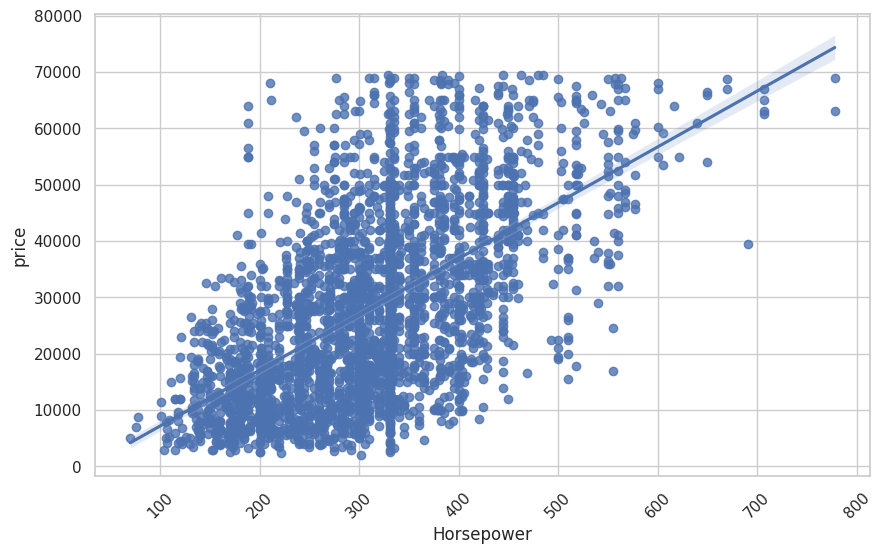

In [66]:
#draw a regressionplot of Horsepower vs price
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'Horsepower', y = 'price', data =df)
plt.xticks(rotation=45)


INSIGHTS: 

* The price increases with increase in engine Horsepower.

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9')])

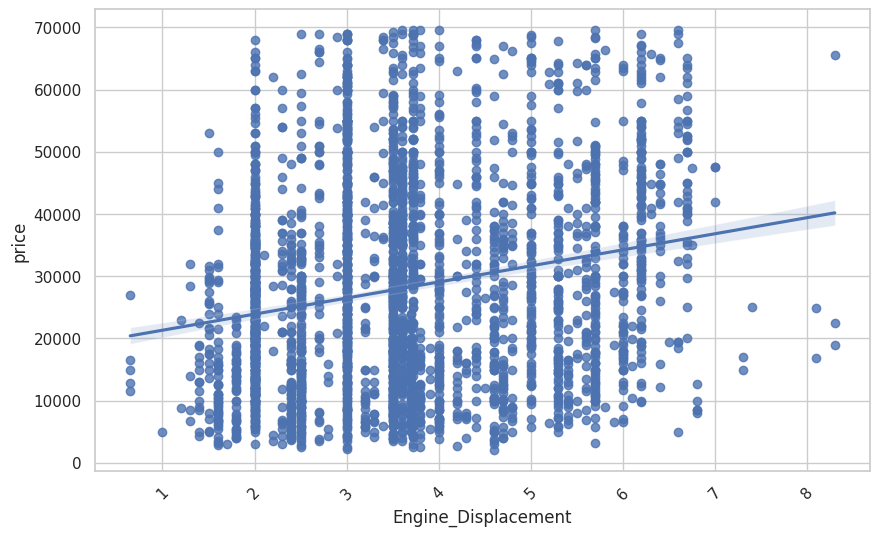

In [67]:
#draw a scatter plot of Engine_Displacement vs price
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x = 'Engine_Displacement', y = 'price', data =df)
plt.xticks(rotation=45)


>INSIGHTS

The larger the engine size the higher the price.

In [68]:
df.describe()

milage         price   Horsepower  Engine_Displacement  \
count    3012.000000   3012.000000  3012.000000          3012.000000   
mean    77291.058433  28132.581341   311.610244             3.633475   
std     52443.195071  16577.205102    97.464659             1.369728   
min       100.000000   2000.000000    70.000000             0.650000   
25%     37056.250000  14900.000000   245.000000             2.500000   
50%     68500.000000  25900.000000   308.000000             3.500000   
75%    107000.000000  39500.000000   365.000000             4.600000   
max    405000.000000  69500.000000   778.000000             8.300000   

               age  
count  3012.000000  
mean      8.772576  
std       6.046516  
min      -1.000000  
25%       4.000000  
50%       7.000000  
75%      12.000000  
max      31.000000

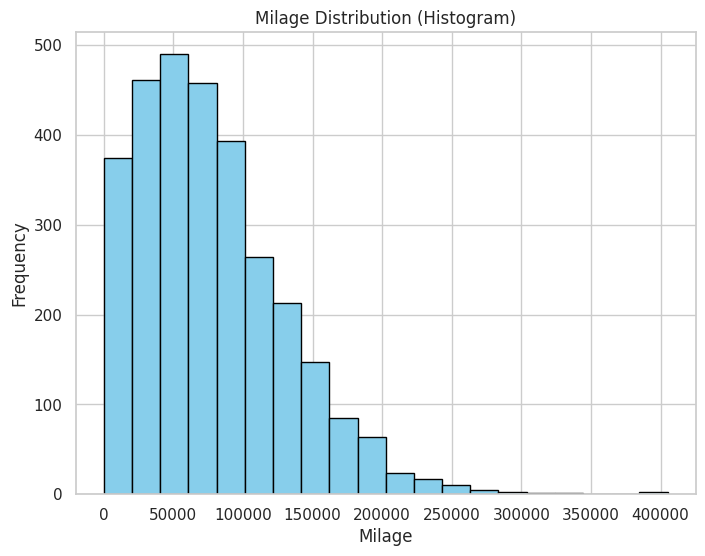

In [69]:
#create a histogram for milage column
plt.figure(figsize=(8, 6))
plt.hist(df['milage'], bins=20, color='skyblue', edgecolor='black')
plt.title('Milage Distribution (Histogram)')
plt.xlabel('Milage')
plt.ylabel('Frequency')
plt.show()


Majority of the cars have lesser milage.

### Causation and Correlation

In [70]:
from scipy import stats
#to find pearson coefficent - Horsepower and Price
pearson_coef, p_value = stats.pearsonr(df['Horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5825360064013879  with a P-value of P = 2.8563798072913555e-273


The correlation is not moderate and the evidence for it's significance is very strong.

In [71]:
#to find pearson coefficent - age and price
pearson_coef, p_value = stats.pearsonr(df['age'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.6124940407114035  with a P-value of P = 1.0445219822256e-309


A moderatly strong negative correlation with high evidence for it's significance.

In [72]:
#to find pearson coefficent - milage and price
pearson_coef, p_value = stats.pearsonr(df['milage'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.6294256145541731  with a P-value of P = 0.0


A very strong evidence that the above correlation exists.

In [73]:
#to find pearson coefficent - engine displacement
pearson_coef, p_value = stats.pearsonr(df['Engine_Displacement'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.21353932547925553  with a P-value of P = 2.114116109008894e-32


A weaker positive correlation with significant evidence of it's existence.

#### **Analysis of Variance - ANOVA**

In [74]:
grp_test = df[['fuel_type','transmission','price']]
new_group_1 = grp_test[['transmission','price']].groupby(['transmission'])
new_group_1.head(5)

transmission    price
0                           6-Speed A/T  10300.0
1                     8-Speed Automatic  38005.0
3                           7-Speed A/T  15500.0
6                           6-Speed A/T  31000.0
7                                   A/T   7300.0
...                                 ...      ...
3175                        7-Speed M/T  61950.0
3210  7-Speed Automatic with Auto-Shift  21612.0
3637                  5-Speed Automatic  31906.0
3800                        7-Speed M/T  60000.0
3807                  5-Speed Automatic  39857.0

[127 rows x 2 columns]

In [75]:
#use f_oneway function to obtain anova values as:
f_val, p_val = stats.f_oneway(
    new_group_1.get_group('6-Speed A/T')['price'],
    new_group_1.get_group('8-Speed Automatic')['price'],
    new_group_1.get_group('7-Speed A/T')['price'],
    new_group_1.get_group('8-Speed A/T')['price'],
    new_group_1.get_group('9-Speed Automatic')['price'],
    new_group_1.get_group('10-Speed A/T')['price'],
    new_group_1.get_group('9-Speed A/T')['price'],
    new_group_1.get_group('Automatic CVT')['price'],
    new_group_1.get_group('7-Speed Automatic with Auto-Shift')['price'],
    new_group_1.get_group('10-Speed Automatic')['price'],
    new_group_1.get_group('6-Speed Automatic')['price'],
    new_group_1.get_group('8-Speed Automatic with Auto-Shift')['price'],
    new_group_1.get_group('7-Speed Automatic')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 26.878222447255197 , P = 8.452424846960196e-54


In [76]:
new_group_2 = grp_test[['fuel_type','price']].groupby(['fuel_type'])
new_group_2.head(5)

fuel_type    price
0     E85 Flex Fuel  10300.0
1          Gasoline  38005.0
3            Hybrid  15500.0
6          Gasoline  31000.0
7          Gasoline   7300.0
8          Gasoline  41927.0
12         Gasoline  53500.0
21    E85 Flex Fuel   4500.0
29    E85 Flex Fuel  21375.0
42           Diesel  14000.0
60   Plug-In Hybrid  42000.0
65           Hybrid  67900.0
84           Hybrid  15900.0
91           Hybrid  31995.0
104          Hybrid  17995.0
117   E85 Flex Fuel   6600.0
124  Plug-In Hybrid  23000.0
125   E85 Flex Fuel  22495.0
130        Electric   9000.0
160          Diesel  65000.0
199          Diesel  54999.0
239  Plug-In Hybrid  49000.0
257        Electric  29500.0
281          Diesel  68000.0
338        Electric  18500.0
379  Plug-In Hybrid  10000.0
491        Electric  20000.0
502          Diesel  19500.0
514  Plug-In Hybrid  65000.0
692        Electric   9599.0

In [77]:
#testing for multiple fuel types
f_val, p_val = stats.f_oneway(new_group_2.get_group('E85 Flex Fuel')['price'], new_group_2.get_group('Gasoline')['price'], new_group_2.get_group('Hybrid')['price'], new_group_2.get_group('Diesel')['price'], new_group_2.get_group('Plug-In Hybrid')['price'], new_group_2.get_group('Electric')['price']) 
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 21.879145741864175 , P = 1.3787404201993489e-21


### **Model Development**

A model is necessary to predict target variable based on the predictor features.

In [78]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          2618
E85 Flex Fuel      127
Hybrid             109
Diesel              88
Electric            42
Plug-In Hybrid      28
Name: count, dtype: int64

In [79]:
#pip install category_encoders


In [80]:
#Apply target encoding to fuel_type column in relation to price 
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['fuel_type'])
df['fuel_type_target'] = encoder.fit_transform(df['fuel_type'], df['price'])
df.head()

brand    milage      fuel_type       transmission          ext_col  \
0      Ford   51000.0  E85 Flex Fuel        6-Speed A/T            Black   
1   Hyundai   34742.0       Gasoline  8-Speed Automatic  Moonlight Cloud   
3  INFINITI   88900.0         Hybrid        7-Speed A/T            Black   
6      Audi   84000.0       Gasoline        6-Speed A/T             Blue   
7       BMW  242000.0       Gasoline                A/T            Green   

  int_col    price  Horsepower  Engine_Displacement  age  fuel_type_target  
0   Black  10300.0  300.000000                  3.7   10      21664.153704  
1    Gray  38005.0  331.445122                  3.8    2      27922.857525  
3   Black  15500.0  354.000000                  3.5    8      34203.951749  
6   Black  31000.0  292.000000                  2.0    6      27922.857525  
7   Green   7300.0  282.000000                  4.4   22      27922.857525

In [81]:
#Apply target encoding to transmission column in relation to price
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['transmission'])
df['transmission_target'] = encoder.fit_transform(df['transmission'], df['price'])
df.head()

brand    milage      fuel_type       transmission          ext_col  \
0      Ford   51000.0  E85 Flex Fuel        6-Speed A/T            Black   
1   Hyundai   34742.0       Gasoline  8-Speed Automatic  Moonlight Cloud   
3  INFINITI   88900.0         Hybrid        7-Speed A/T            Black   
6      Audi   84000.0       Gasoline        6-Speed A/T             Blue   
7       BMW  242000.0       Gasoline                A/T            Green   

  int_col    price  Horsepower  Engine_Displacement  age  fuel_type_target  \
0   Black  10300.0  300.000000                  3.7   10      21664.153704   
1    Gray  38005.0  331.445122                  3.8    2      27922.857525   
3   Black  15500.0  354.000000                  3.5    8      34203.951749   
6   Black  31000.0  292.000000                  2.0    6      27922.857525   
7   Green   7300.0  282.000000                  4.4   22      27922.857525   

   transmission_target  
0         23625.939306  
1         36639.401193  
3         32901.617416  
6         23625.939306  
7         24175.910160

In [82]:
#Apply target encoding to brand column in relation to price
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['brand'])
df['brand_target'] = encoder.fit_transform(df['brand'], df['price'])
df.head()


brand    milage      fuel_type       transmission          ext_col  \
0      Ford   51000.0  E85 Flex Fuel        6-Speed A/T            Black   
1   Hyundai   34742.0       Gasoline  8-Speed Automatic  Moonlight Cloud   
3  INFINITI   88900.0         Hybrid        7-Speed A/T            Black   
6      Audi   84000.0       Gasoline        6-Speed A/T             Blue   
7       BMW  242000.0       Gasoline                A/T            Green   

  int_col    price  Horsepower  Engine_Displacement  age  fuel_type_target  \
0   Black  10300.0  300.000000                  3.7   10      21664.153704   
1    Gray  38005.0  331.445122                  3.8    2      27922.857525   
3   Black  15500.0  354.000000                  3.5    8      34203.951749   
6   Black  31000.0  292.000000                  2.0    6      27922.857525   
7   Green   7300.0  282.000000                  4.4   22      27922.857525   

   transmission_target  brand_target  
0         23625.939306  30787.469512  
1         36639.401193  18469.649438  
3         32901.617416  22000.786203  
6         23625.939306  29660.234575  
7         24175.910160  30589.837456

In [83]:
#drop ext_col and int_col
df.drop(['ext_col', 'int_col'], axis = 1, inplace = True)
df.head()

brand    milage      fuel_type       transmission    price  Horsepower  \
0      Ford   51000.0  E85 Flex Fuel        6-Speed A/T  10300.0  300.000000   
1   Hyundai   34742.0       Gasoline  8-Speed Automatic  38005.0  331.445122   
3  INFINITI   88900.0         Hybrid        7-Speed A/T  15500.0  354.000000   
6      Audi   84000.0       Gasoline        6-Speed A/T  31000.0  292.000000   
7       BMW  242000.0       Gasoline                A/T   7300.0  282.000000   

   Engine_Displacement  age  fuel_type_target  transmission_target  \
0                  3.7   10      21664.153704         23625.939306   
1                  3.8    2      27922.857525         36639.401193   
3                  3.5    8      34203.951749         32901.617416   
6                  2.0    6      27922.857525         23625.939306   
7                  4.4   22      27922.857525         24175.910160   

   brand_target  
0  30787.469512  
1  18469.649438  
3  22000.786203  
6  29660.234575  
7  30589.837456

In [84]:
#correlation between price and fuel_type_target
df['fuel_type_target'].corr(df['price'])


0.1864617625648253

In [85]:
#correlation between price and transmission_target
df['transmission_target'].corr(df['price'])


0.43986767922276543

In [86]:
#correlation between price and brand_target
df['brand_target'].corr(df['price'])

0.3756527532876745

**>INSIGHTS**

* In model development up till now, the columns such 'brand', 'fuel_type' and 'transmission' were subjected to target encoding.

* In Target Encoding, the mean of each category in a categorical variable is calculated in relation to the target variables, in this case - 'price'.

* That mean is then assigned to that category as number.

* Later on, we found out correlations between all those variables and found out that these variables were partially correlated to price.

* This already tells us that a Simple Linear Regression Model won't work, however to better understand the extent of these relationships, it is important to experiment with Linear Regression.

#### **1. Linear Regression Model**

*> Linear Regression Model*

    * Contains simply 

        Predictor variable - X

        Target variable - Y

        Intercept (value of Y when X = 0) - a

        Slope (Value with which Y increases by increasing X by 1) - b

    * Equation
    
        Y = a + bX


In [87]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = df[['brand_target']]
y = df[['price']]
lm.fit(x,y)

LinearRegression()

In [88]:
#make predictions
yhat = lm.predict(x)
yhat[0:5]

array([[30823.9005172 ],
       [17341.75917746],
       [21206.67071733],
       [29590.1155895 ],
       [30607.58762244]])

In [89]:
#find the intercept
lm.intercept_

array([-2873.70287014])

In [90]:
#find the slope
lm.coef_

array([[1.09452332]])

In [91]:
#find the MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], yhat)
mse


235946441.75934535

In [92]:
#find the RMSE
rmse = np.sqrt(mse)
rmse

15360.548224570155

In [93]:
#find rscore
from sklearn.metrics import r2_score
r2_score(df['price'], yhat)


0.14111499105261005

**>INSIGHTS**

The r2score and rmse both show that - that a linear relationship specially with a single variable - doesn't exist.

#### 2. Multiple Linear Regression

$$
Y: Response \ Variable\\\\
X_1 :Predictor\ Variable \ 1\\\\
X_2: Predictor\ Variable \ 2\\\\
X_3: Predictor\ Variable \ 3\\\\
X_4: Predictor\ Variable \ 4\\\\
$$

$$
a: intercept\\\\
b_1 :coefficients \ of\ Variable \ 1\\\\
b_2: coefficients \ of\ Variable \ 2\\\\
b_3: coefficients \ of\ Variable \ 3\\\\
b_4: coefficients \ of\ Variable \ 4\\\\
$$

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


In [94]:
#define Z as the input
Z = df[['brand_target', 'fuel_type_target', 'transmission_target', 'age', 'milage', 'Horsepower', 'Engine_Displacement']]
Z.head()


brand_target  fuel_type_target  transmission_target  age    milage  \
0  30787.469512      21664.153704         23625.939306   10   51000.0   
1  18469.649438      27922.857525         36639.401193    2   34742.0   
3  22000.786203      34203.951749         32901.617416    8   88900.0   
6  29660.234575      27922.857525         23625.939306    6   84000.0   
7  30589.837456      27922.857525         24175.910160   22  242000.0   

   Horsepower  Engine_Displacement  
0  300.000000                  3.7  
1  331.445122                  3.8  
3  354.000000                  3.5  
6  292.000000                  2.0  
7  282.000000                  4.4

**>Z - Varible**

The Z variable defined above is going to the primary Multiple features variable for Multiplr Linear Regression as well as Polynomial and Ridge Regression. 

It contains all the numerical variables including the encoded ones.

In [95]:
#fit the linear model
lm.fit(Z, y)


LinearRegression()

In [96]:
#make predictions
yhat2 = lm.predict(Z)
yhat2[0:5]

array([[25658.55236718],
       [37149.26665632],
       [32198.1013444 ],
       [26930.46116981],
       [-2390.0707537 ]])

In [97]:
#find the intercept
lm.intercept_

array([-7915.23321379])

In [98]:
#find the slope
lm.coef_

array([[ 3.27292867e-01,  6.78321367e-01,  6.51304580e-02,
        -8.24286704e+02, -1.15052933e-01,  5.94235846e+01,
         9.58575961e+02]])

In [99]:
#calculate Rsquare
lm.score(Z, y)


0.7105092741463409

In [100]:
#find the MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], yhat2)
mse

79526718.91573893

**>INSIGHTS - R2score & MSE**

Apparently, with MLR - both Rscore and MSE are good so far considering that data had too many outliers.


In [101]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Z, y, test_size = 0.2, random_state = 0)


In [102]:
#fit the linear model
lm.fit(x_train, y_train)


LinearRegression()

In [103]:
#make predictions
yhat3 = lm.predict(x_test)
yhat3[0:5]

array([[33243.02632485],
       [37566.05346629],
       [28046.71816493],
       [22787.48228468],
       [30428.40203856]])

In [104]:
#calculate Rsquare
lm.score(x_test, y_test)


0.7137180377081783

In [105]:
#calculate R2score
from sklearn.metrics import r2_score
r2_score(y_test, yhat3)


0.7137180377081783

**>INSIGHTS - TEST DATA SCORE**

The test data score - 0.7137180377081778, tells us that the model's performance is not bad and it can predict very well.

/tmp/ipykernel_20/629181613.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/tmp/ipykernel_20/629181613.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat3, hist=False, color="b", label="Fitted Values")


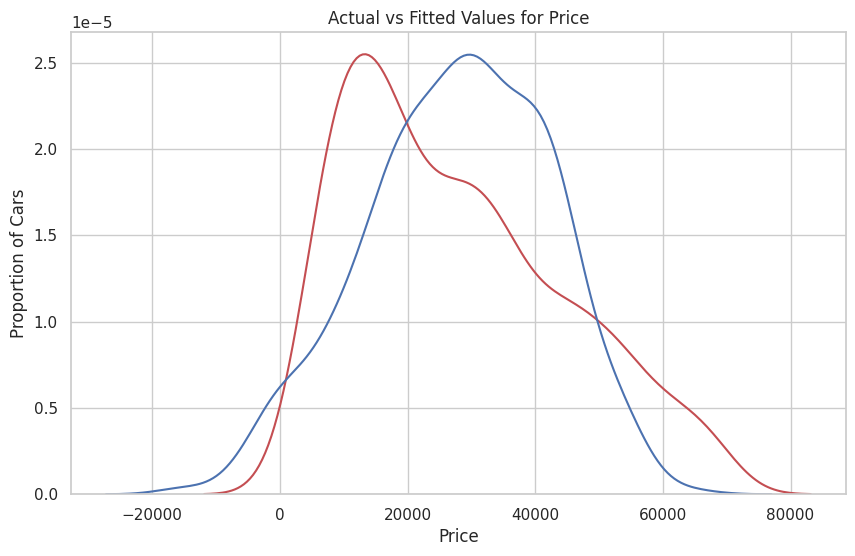

In [106]:
#distribution plot of y_test and yhat3
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat3, hist=False, color="b", label="Fitted Values")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()


**1. >INSIGHTS - DISTRIBUTION PLOT**

The plot above compares actual values of 'price' (red) and predicted price values (blue).

The graph doesn't fit completely but follows the same pattern as the actual values do.

#### 3. Polynomial Regression Model

The models before have given a bigger clue that no linear relationship exists, it means that non-linear relationships might be present.

Polynomial Regression Model is built to explore such non - linear relationships and make predictions.

<p>There are different orders of polynomial regression:</p>
<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$


<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$


<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$


In [107]:
#Perform polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [108]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [109]:
pr = PolynomialFeatures(degree=3)
pr

PolynomialFeatures(degree=3)

In [110]:
#fit transform Z
Z_pr = pr.fit_transform(Z)
Z_pr.shape

(3012, 120)

In [111]:
#create a linear regression model object for polynomial regression
poly = LinearRegression()
poly

LinearRegression()

In [112]:
#fit the polynomial model
poly.fit(Z_pr, y)

LinearRegression()

In [113]:
#import standard scaler and pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#create a list of tuples - each containing a model/estimator and its constructor
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]


**>PIPELINE**

* A pipeline makes the process of standardization - more easier and quicker.

In [114]:
#pipe line object
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [115]:
#fit the pipeline object
pipe.fit(Z_pr,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [116]:
#Make predictions using the pipeline object
ypipe=pipe.predict(Z_pr)
ypipe[0:4]


array([[10299.99835777],
       [36905.37690544],
       [15500.16731071],
       [21527.4931469 ]])

In [117]:
#calculate Rsquare
pipe.score(Z_pr, y)


0.9274267922005733

/tmp/ipykernel_20/1745438203.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, hist=False, color="r", label="Actual Value")
/tmp/ipykernel_20/1745438203.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypipe, hist=False, color="b", label="Fitted Values")


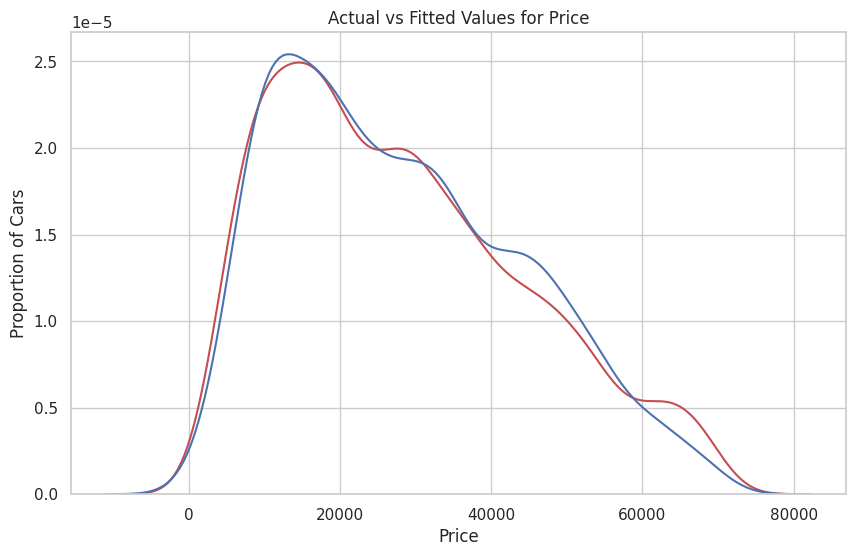

In [118]:
#distribution plot of y and ypipe
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()


**>INSIGHTS**

The above plot obtained as result of 3rd degree Polynomial Regression on the Z variable and Y, shows a very good fit.

The r-score for it was around 0.92 which is good for such a model.

**>MODEL EVALUATION**

It involves train and test splitting of the data to validate the model performance.

In [119]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Z_pr, y, test_size = 0.2, random_state = 0)


In [120]:
#fit the pipeline object
pipe.fit(x_train, y_train)


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [121]:
#Make predictions using the pipeline object
ypipe2=pipe.predict(x_test)
ypipe2[0:4]


array([[32898.17936707],
       [35169.94090271],
       [24411.8971405 ],
       [10561.24531555]])

In [122]:
ypipe2_train = pipe.predict(x_train)


In [123]:
pipe.score(x_train, y_train)

0.9390411958597711

In [124]:
#calculate Rsquare
pipe.score(x_test, y_test)


-144372332286.1021

**>INSIGHTS - Negative R-score**

It shows model over fitting. 

When the degree of Polynomial was raised from 2 to 3, this issue arised.

This will resolved using Ridge Regression.

/tmp/ipykernel_20/2505404631.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/tmp/ipykernel_20/2505404631.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypipe2, hist=False, color="b", label="Fitted Values")


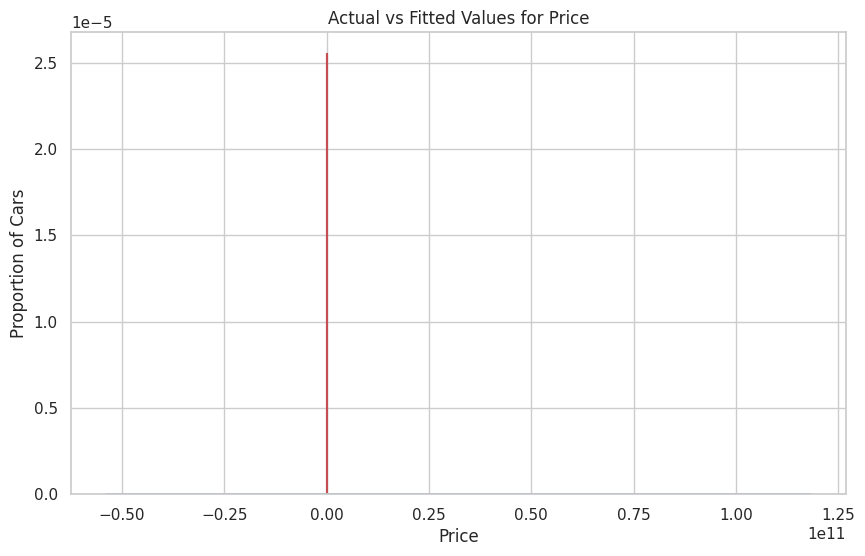

In [125]:
#Distribution plot of y_test and ypipe2
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(ypipe2, hist=False, color="b", label="Fitted Values")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()


>**INSIGHTS**

The above distribution plot shows - model over fitting of the test data.

It will be resolved with Ridge Regression.

>**Residual Plot**

It plot the difference b/w predicted values and the actual target values - called residual.

The plot shows the residual points scattered around mean - 0.

/opt/conda/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


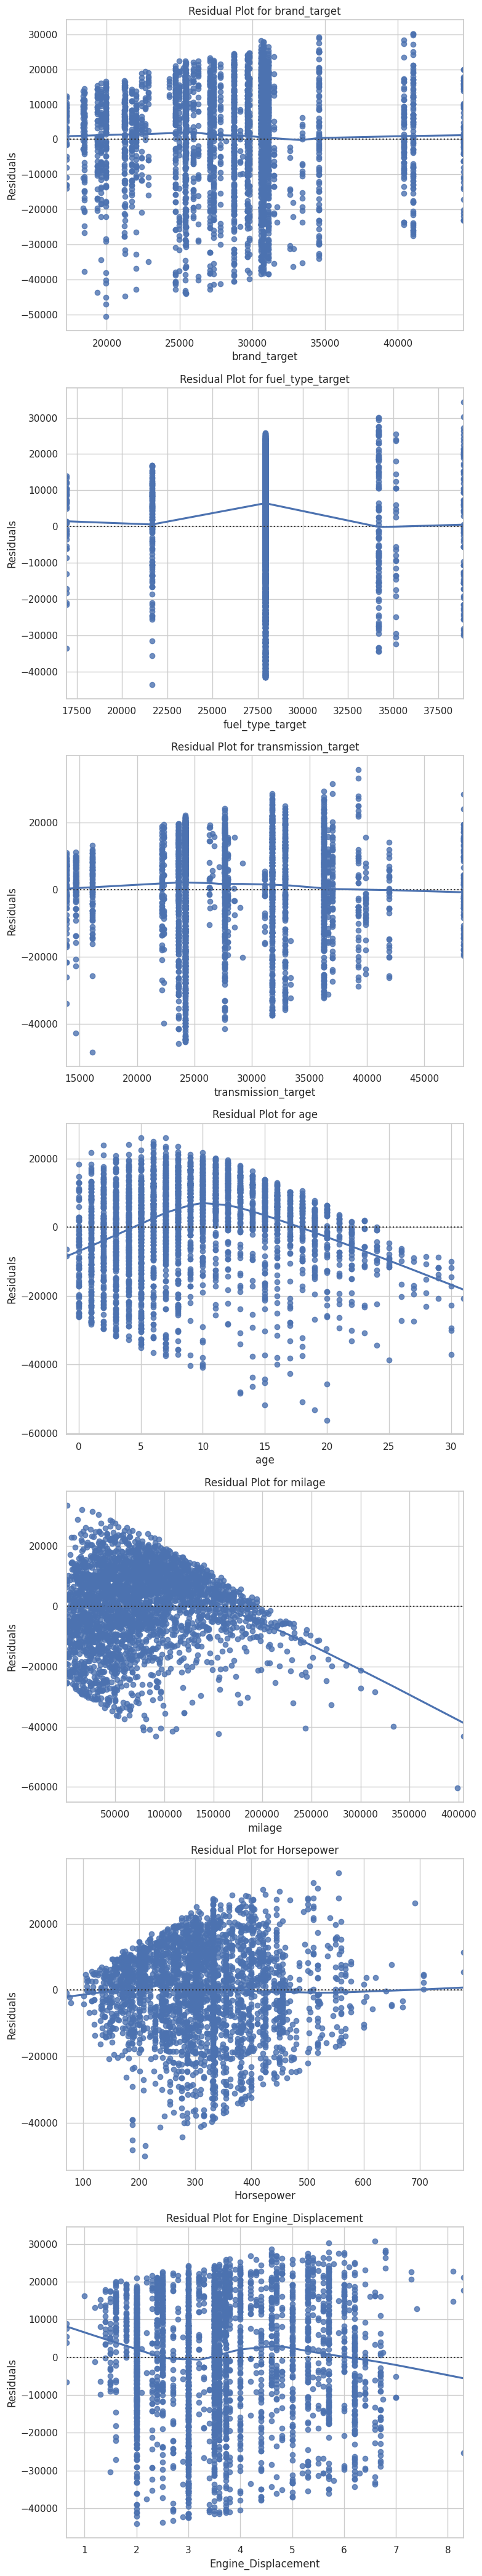

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns including 'Price' and other predictor variables

# List of predictor variables you want to create residual plots for
predictor_variables = Z.columns

# Create subplots for each predictor variable
fig, axes = plt.subplots(nrows=len(predictor_variables), ncols=1, figsize=(8, 6 * len(predictor_variables)))

# Loop through each predictor variable and create residual plots
for i, var in enumerate(predictor_variables):
    # Calculate residuals for the current variable
    residuals = df[var] - df['price']
    
    # Create a residual plot
    sns.residplot(x=df[var], y=residuals, ax=axes[i], color='b', lowess=True)
    
    # Set plot labels and title
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Residuals')
    axes[i].set_title(f'Residual Plot for {var}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



>**INSIGHTS - RESIDUAL PLOTS**

Above are residual plots for various variables plotted to show the distribution variance around the mean.

### **MODEL EVALUATION & REFINEMENT**

In [127]:
#Import libraries for plotting and make interactive plots
from ipywidgets import interact, interactive, fixed, interact_manual

In [128]:
#Function for Distribution plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [129]:
#Function for Regression Plots
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.max(), xtest.max()])

    xmin=min([xtrain.min(), xtest.min()])

    x=np.arange(xmin, xmax, 200.0)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

#### **1. Cross Validation Score**

  Used when the testing data is small - so training data is used to validation MSE and R-square

In [130]:
#Import corss_val_score module
from sklearn.model_selection import cross_val_score
#Find R-square
Rcross = cross_val_score(poly, Z_pr, y, cv=4)
Rcross

array([0.75895636, 0.76694824, 0.82179624, 0.78854236])

In [131]:
#Get mean and standard deviation of estimate
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.7840607992094099 and the standard deviation is 0.02432653123154561


In [132]:
#To obtain negative MSE
-1 * cross_val_score(poly,Z_pr, y,cv=4,scoring='neg_mean_squared_error')

array([70958024.92355849, 62275623.92465733, 49253464.65108214,
       54706643.10198322])

#### **2. Cross Validation Predict**

In [133]:
#To make prediction - import cross_val_predict module
from sklearn.model_selection import cross_val_predict
#Do prediction
yhat = cross_val_predict(poly,Z_pr, y,cv=4)
yhat[0:5]

array([[26727.85293549],
       [34142.03329512],
       [28467.67987114],
       [23285.96834538],
       [ 9196.12290998]])

##### Model Performance

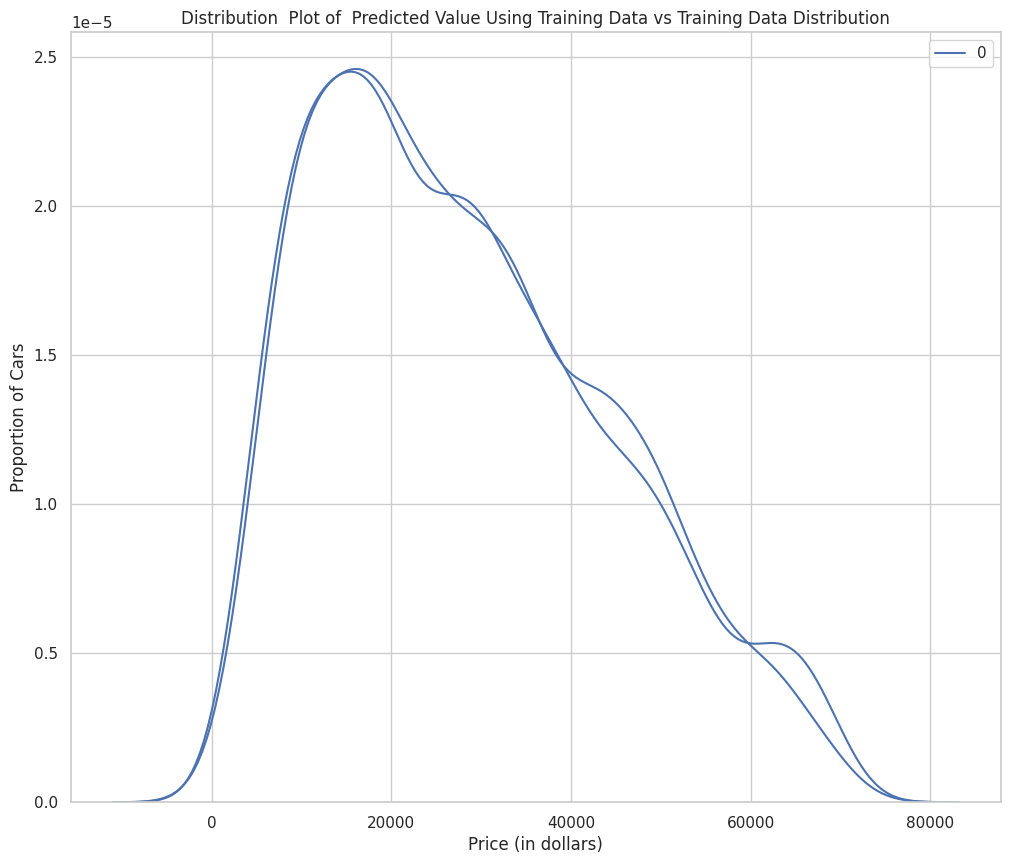

In [134]:
#Lets visualize the model performance
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#First go for distribution plot on Training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, ypipe2_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

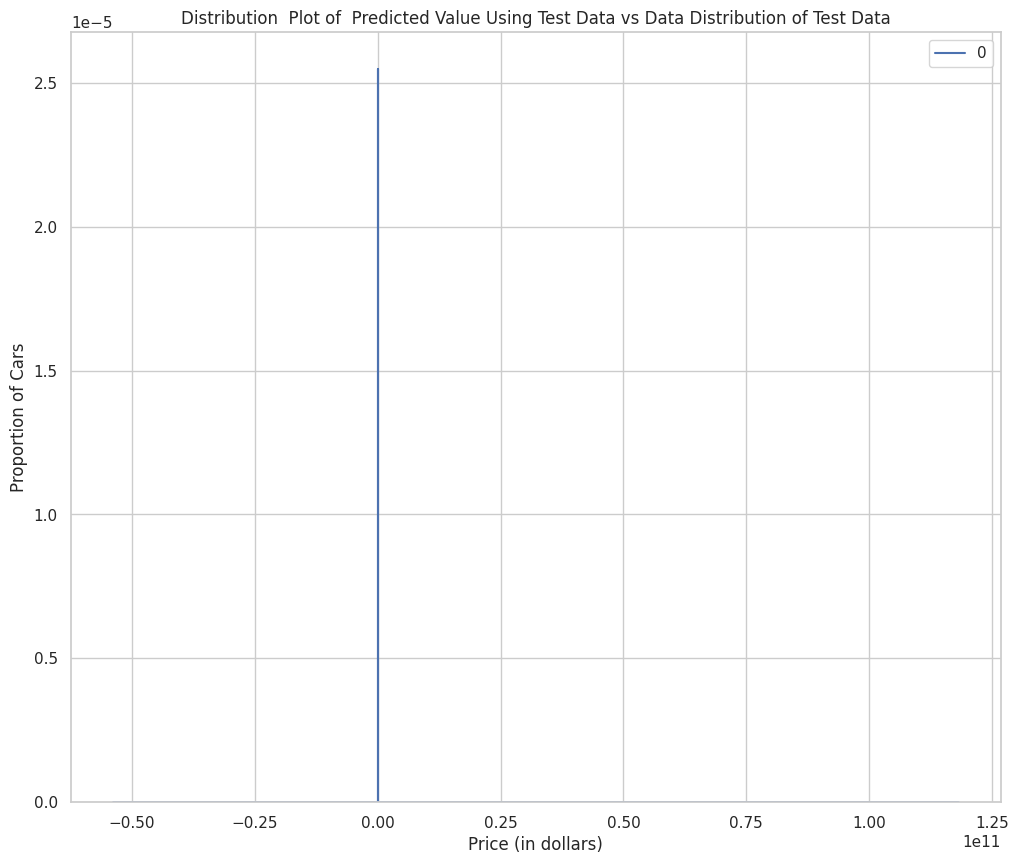

In [135]:
#Distribution plot on Testing data
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, ypipe2,"Actual Values (Test)","Predicted Values (Test)",Title)

### **Ridge Regression**

It is being performed here to remove the issue of over fitting ny providing a specific Hyperparameter (alpha) to get a near good fit.

In [136]:
#First - perform 2nd order polynomial transformation on the train  and test data
#pr=PolynomialFeatures(degree=2)
#x_train_pr=pr.fit_transform(x_train)
#x_test_pr=pr.fit_transform(x_test)


In [137]:
#import necessary modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

#create the variable Z
Z = df[['brand_target', 'fuel_type_target', 'transmission_target', 'age', 'milage', 'Horsepower', 'Engine_Displacement']]

#set the target variable y
y = df['price']  # Replace 'target_variable' with the actual name of your target variable
#fit transform Z
Z_pr1 = pr.fit_transform(Z)
Z_pr1.shape

#create a list of tuples - each containing a preprocessing step and its constructor
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False))]

#create the pipeline object
pipe = Pipeline(Input + [('model', TransformedTargetRegressor(regressor=Ridge(), transformer=StandardScaler()))])

#fit the pipeline object
pipe.fit(Z_pr1, y)


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model',
                 TransformedTargetRegressor(regressor=Ridge(),
                                            transformer=StandardScaler()))])

In [138]:
# Assuming you have already fitted the pipeline object (pipe.fit(Z, y))

# Make predictions
y_hat_rr = pipe.predict(Z_pr1)

# Print the predictions
print(y_hat_rr[0:4])

[22153.58283246 32240.55295543 22839.21913555 22599.72926792]


In [139]:
#find the r2score
pipe.score(Z_pr1, y)


0.8700067224131086

In [140]:
#import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error

#create the variable Z
Z = df[['brand_target', 'fuel_type_target', 'transmission_target', 'age', 'milage', 'Horsepower', 'Engine_Displacement']]

#set the target variable y
y = df['price']  # Replace 'target_variable' with the actual name of your target variable
#fit transform Z
Z_pr1 = pr.fit_transform(Z)
Z_pr1.shape
#split the data into training and testing sets
Z_train, Z_test, y_train, y_test = train_test_split(Z_pr1, y, test_size=0.4, random_state=0)

#create a list of tuples - each containing a preprocessing step and its constructor
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False))]

#create the pipeline object
pipe = Pipeline(Input + [('model', TransformedTargetRegressor(regressor=Ridge(alpha=100.0), transformer=StandardScaler()))])

#fit the pipeline object on the training data
pipe.fit(Z_train, y_train)

#make predictions on the testing data
y_hat_rr1 = pipe.predict(Z_test)

#evaluate the model
mse = mean_squared_error(y_test, y_hat_rr1)
print("Mean Squared Error:", mse)
#find the r2score
print(pipe.score(Z_test, y_test))
#find the r2score for training data
print(pipe.score(Z_train, y_train))



Mean Squared Error: 58546228.33890333
0.7962024428750568
0.8478009847837817


In [141]:
#Lets create an iteration to see different R-square values for different values of Alpha
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,200))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(Z_train, y_train)
    test_score, train_score = RigeModel.score(Z_test, y_test), RigeModel.score(Z_train, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|          | 0/200 [00:00<?, ?it/s, Test Score=0.788, Train Score=0.816]/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.44839e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  0%|          | 0/200 [00:00<?, ?it/s, Test Score=0.788, Train Score=0.816]/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08968e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  2%|▏         | 3/200 [00:00<00:06, 28.25it/s, Test Score=0.788, Train Score=0.816]/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.63452e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
  2%|▏         | 3/200 [00:00<00:06, 28.25it/s, Test Score=0.788, Train Score=0.

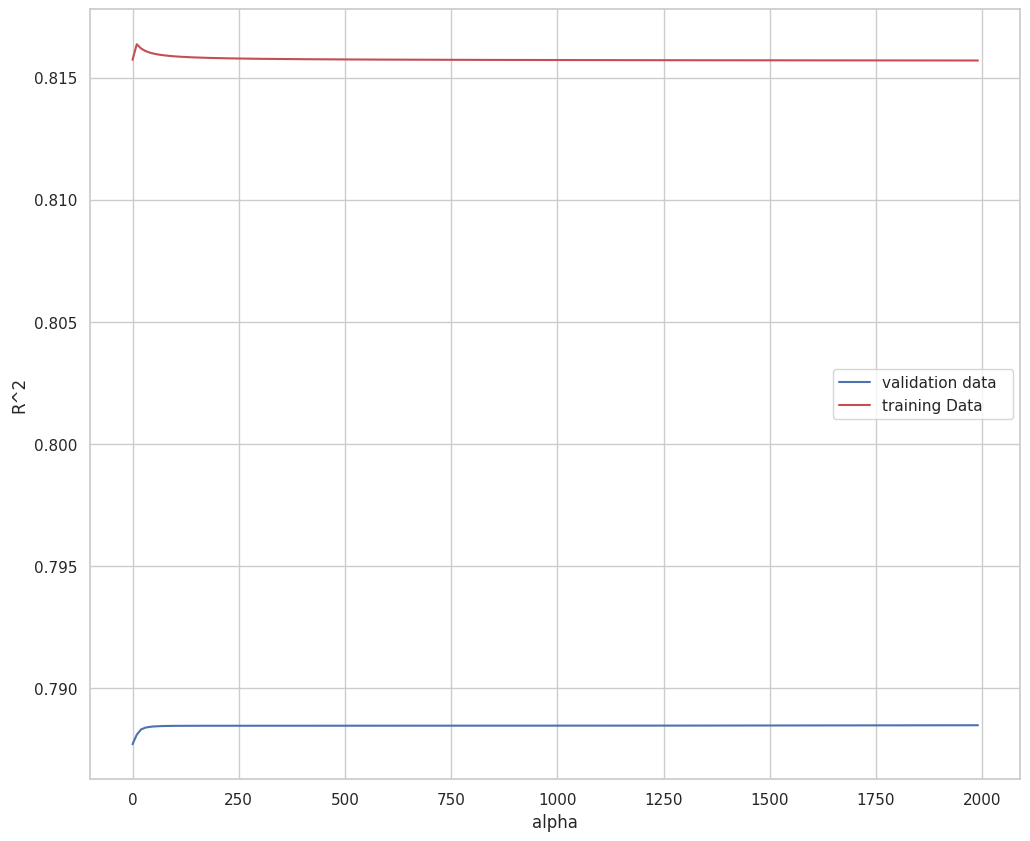

In [142]:
#Lets plot the values
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

>**INSIGHT**

The ridge regression analysis - gave us a range of hyperparameters to see which one works best, apparently after 100 the r2score starts to become stable. 

Now, we have to find the model with the best estimate.

### **Grid Search**

Grid Search helps in finding the Ridge Regression Model with an alpha values that gives the best r2score.

In [143]:
#import gridsearchcv
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for grid search
param_grid = {
    'model__regressor__alpha': [0.1, 1, 10, 100]  # Specify the alpha values you want to test
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=6, scoring='r2')

# Fit the grid search on the training data
grid_search.fit(Z_train, y_train)

# Get the best estimator model
best_estimator = grid_search.best_estimator_

# Print the best estimator model
best_estimator

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model',
                 TransformedTargetRegressor(regressor=Ridge(alpha=100),
                                            transformer=StandardScaler()))])

In [144]:
#find the r2score for the best estimator
best_estimator.score(Z_test, y_test)

0.7962024428750568

In [145]:
#find the r2score for the best estimator on training data
best_estimator.score(Z_train, y_train)

0.8478009847837817

In [146]:
#find the alpha value for the best estimator
best_estimator['model'].regressor_.alpha


100

/tmp/ipykernel_20/1096847815.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/tmp/ipykernel_20/1096847815.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat_rr1, hist=False, color="b", label="Fitted Values")


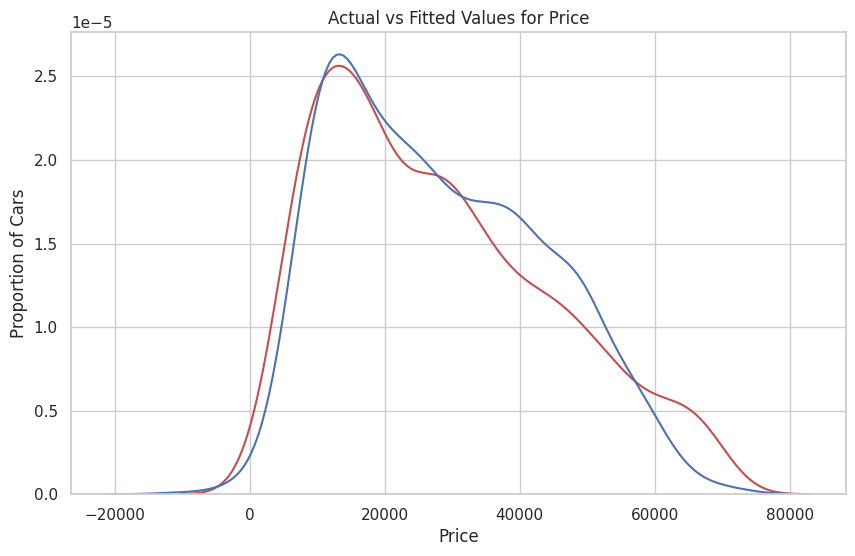

In [147]:
#visualize the distribution plot of y_test and y_hat_rr1
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_rr1, hist=False, color="b", label="Fitted Values")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()
